# 통계

Last updated 202311_202010

샘플링, 분포, 중심극한정리, 분산, zscore, outliers를 배운다.
그룹 간에 평균의 차이가 있는지 통계 추론을 배운다. 또한 명목변수는 그룹간의 빈도 차이를 분석한다.
변수 간 상관관계를 배운다.

Spark와 더불어 통계에 많이 쓰이는 Python 라이브러리로서 Pandas, 행렬 numpy, 과학계산 SciPy, 통계추론 statsmodels, 기계학습 scikit-learn도 활용한다.

* S.2 변수의 성격
* S.3 샘플링: 무작위 수, 무작위 배열, 분포에서 무작위 수
* S.4 균등분포: 샘플링, 히스토그램, describe
* S.5 정규분표: 샘플링, 히스토그램
* S.6 중심극한정리: skewness, kurtosis, Spark로 skewness, kurtosis 계산하기
* S.7 분산: 평균 계산식, numpy 평균, 분산 계산식, numpy 분산 계산, boxplot
* S.8 zscore, tscore: zscore 계산식, stats zscore, cdf
* S.9 outliers
* S.10 추론: Kolmogorov-Smirnov 검증, ANOVA
* S.11 빈도 분석
* S.12 상관관계: numpy 공분산, 상관관계 표
* toAdd: Type I II Error (베이지안 판단오류), MAPE MRE MSE, 추천의 L-form

## S.2 변수의 성격

빅데이터는 통계와 같은 이전의 방식으로 분석하기에는 잘 맞지 않는 대규모이거나 복잡한 성격의 데이터를 말한다.

데이터는 **숫자**, **텍스트**로 구분할 수 있다. 숫자 값은 정수나 소수로 표현되고, 년봉, 매출액, 관객수와 같이 '크다' 또는 '작다' 하는 의미가 있다. 반면에 텍스트는 분석하기 어려울 수 밖에 없고, 어떻게든 정량화하기 위해 단어의 빈도로 변환하고 있다.

측정하는 변수는 크게 나누면 다음과 같다.

(1) **명목변수 Nominal varaible**는 남녀 성별과 같이 **순서가 없이** 이름이 있는 변수를 말한다.
검은색, 흰색, 파란색 등의 색이나 종로구, 영등포구 등 지역구가 명목변수의 예가 된다.

(2) **순위변수 Ordinal variable**은 어떤 **순서가 있는** 범주에 속하여 그 범주의 이름을 말한다.
'초등학고', '중학교', '고등학교', '대학교'와 같이 구분하여 붙인 이름이 예가 되고, 하위 학교를 마치고 나면 다음 등급으로 진학하는 순서가 있다.
소득수준을 '차상위', '중위', '상위'로 구분하면 **순위변수**에 해당된다.

(3) 여기서 범주를 **등간격**으로 **간격변수 Interval variable**이라고 한다.
자신의 느낌을 '좋다', '보통', '안좋다' 로 범주화하는 경우이다.

(4) 키, 몸무게와 같이 **연속 변수 Continuous variable**이 있다.

통계에서는 **변수의 성격에 따라 적용되는 분석의 방법이 다를 수** 밖에 없다. 예를 들어:

- 이산 값인 경우 이산분포 (주사위를 던져서 나오는 수)
- 빈도인 경우 포아송분포 (이산분포의 한 종류로 볼 수 있고, 단위 시간 또는 단위 공간에서 발생하는 횟수를 나타낸다. 예를 들면 특정시간에 도착하는 버스 수)
- 연속 값인 경우 정규분포로 모델링하여 평균, 표준편차, 확률 등의 통계량을 계산할 수 있다.


## S.3 샘플링

### 무작위 수

통계에 무작위 수는 빼놓을 수 없는데, 분포는 무작위 수로부터 만들어 지고, 확률이 계산된다.

수학에서 x + 3 = 5라고 하자, 그러면 x는 당연히 2이고, 무작위 값을 가질 수 없다. 무작위 수는 어떤 값을 가지게 될지 모르는 수를 말한다.

무작위 수는 몸무게와 같이 **연속 continuous** 또는 주사위에서와 같이 1 ~ 6 값을 가지게 되는 **이산적 discrete**일 수 있다.

무작위 데이터를 생성해 보자. random 모듈을 사용해서 생성하고, 이는 연속 값이다.

In [1]:
import random

그러나 random은 seed를 주어야 무작위 수를 생성하게 된다. 아니면 반복 수를 생성한다.

In [2]:
#random.seed()
random.seed(3)
print("1st random number on the basis of the seed {}".format(random.random()))
print("2nd random number on the basis of the seed {}".format(random.random()))

1st random number on the basis of the seed 0.23796462709189137
2nd random number on the basis of the seed 0.5442292252959519


- L1: 주석을 활성화해서 연습할 수 있다. **seed 수를 주지 않으면 운영체제 시간**을 사용하므로 무작위 수를 생성하게 된다.
- L2: randmo.seed() 함수에 **수를 넣으면 이를 기반으로 무작위 수를 생성하지만, 전과 동일한 수**가 생성된다.

다시 한 번 동일한 seed를 제공하고 무작위 수를 생성하면 이전의 수와 동일한 무작위 수가 생성된다.

In [3]:
#random.seed()
random.seed(3)
print("1st random number on the basis of the seed {}".format(random.random()))
print("2nd random number on the basis of the seed {}".format(random.random()))

1st random number on the basis of the seed 0.23796462709189137
2nd random number on the basis of the seed 0.5442292252959519


### 무작위 배열

이번에는 numpy를 사용하여 무작위 배열을 생성해 보자.

**numpy는 공학계산**에 많이 사용되는 라이브러리로서
```import numpy as np```로 numpy를 np라는 이름으로 사용하자.

In [4]:
import numpy as np

numpy의 random() 함수에 행과 열에 해당하는 숫자를 주면 배열로 생성이 된다. seed가 없어도 매 회 무작위 수를 생성한다.

In [6]:
print (np.random.random((3,2)))

[[0.55996709 0.51292018]
 [0.67898725 0.26640577]
 [0.53733904 0.63845064]]


### 분포에서 무작위 수

분포를 가정하고, 무작위 표본 Sample을 추출할 수 있다.
* numpy.random.rand는 **균등분포**
* numpy.random.randn은 **표준정규분포** (평균 $\mu=0$, 표준편차 $\sigma=1$)에서 샘플을 추출한다.

In [7]:
np.random.randn()

-0.8034362217859083

np.random.random_sample, random.sample 모두 **균등분포**에서 표본을 추출한다.

In [8]:
print (np.random.random_sample( (3,2) ))

[[0.1497064  0.6346036 ]
 [0.66355391 0.91608388]
 [0.05414828 0.69405786]]


random.sample(population, k) 함수는 모집단에서 (정수)샘플 K 개 돌려준다 (바꿔치기 안함).

In [9]:
import random
print (random.sample([1,2,3,4,6], 2))
print (random.sample([1,2,3,4,6], 3))

[3, 4]
[6, 1, 3]


## S.4 균등 분포

주사위를 던져 나오는 수는 1~6 사이에 있다. 여기서 얻어지는 주사위 수가 선택될 확률은 동일하므로, **균등분포** uniform distribution가 된다.

### 샘플링

1에서 6사이의 무작위 수 100개를 생성해보자.
그러면 동일한 확률이므로 비슷한 빈도가 형성이 될 것이다.
dice를 리스트로 선언하고, 1에서 6사이의 무작위 수 100개를 생성하여 추가하자.

In [11]:
dice=[]
for i in range(100):
   dice.append(random.randrange(1,6+1))

In [11]:
print (dice)

[2, 4, 4, 1, 5, 6, 3, 2, 5, 6, 1, 3, 3, 4, 3, 2, 3, 6, 1, 2, 4, 4, 1, 4, 1, 5, 3, 3, 6, 5, 4, 2, 3, 1, 2, 4, 3, 6, 1, 3, 2, 4, 3, 1, 3, 1, 4, 3, 6, 3, 4, 1, 2, 1, 3, 1, 6, 1, 3, 1, 6, 6, 6, 6, 5, 3, 3, 2, 3, 3, 3, 6, 4, 2, 5, 2, 1, 6, 5, 6, 2, 1, 5, 6, 5, 5, 6, 4, 3, 6, 4, 4, 3, 3, 2, 6, 6, 2, 6, 4]


### 히스토그램

1~6 사이의 빈도수가 몇 개인지 세어보자.
균등분포이므로 $\frac{100}{6} = 16.7$, 즉 16 또는 17회가 발생해야 맞다.

그러나 발생빈도가 평균치를 넘거나 이르지 못한 경우도 물론 가능하다.
주사위 던지는 회수를 늘리면 균등분포에 근사해지게 될 것이다.

In [9]:
# bin의 수가 10개라서 주사위 6개가 아님.
for i in range(1,7):
   print("Dice {}: {}회".format(i, dice.count(i)))

Dice 1: 20회
Dice 2: 21회
Dice 3: 12회
Dice 4: 15회
Dice 5: 16회
Dice 6: 16회


각 사건의 발생빈도를 막대그래프로 그려보자.
hist() 함수의 인자는 **배열**이 필요하며, 앞서 생성하였던 dice를 인자로 넘겨준다.

그 dice로부터 **x: 발생 수 (즉 1~6), y: 빈도수**를 만들어 그래프를 그리게 된다.
막대그래프는 이러한 x, y에서 생성하게 된다.

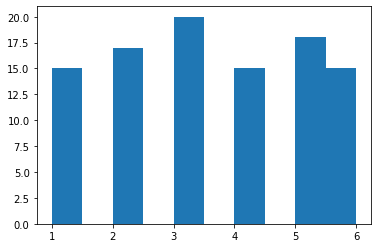

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(dice)
plt.show()

위 그래프를 보면, 마지막이 붙어 있다.
앞에서부터 2개의 값을 선택하여 막대가 그려지는데,
마지막 막대를 그리는 경우, 6 이상을 넘어가지 못하게 되어서 그렇다.

이를 교정하기 위해 0.5부터 시작해서 1씩 증가하도록 구간 bin을 구성하자.
0.5 ~ 1.5, 1.5 ~ 2.5, ... 7개의 값이 필요하다.

In [23]:
import numpy as np
np.arange(0.5, 7)

array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])

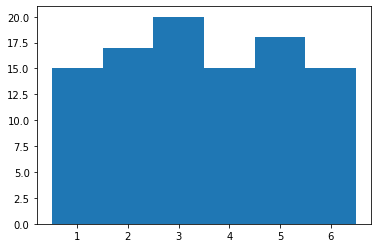

In [22]:
plt.hist(dice, bins = np.arange(0.5, 7))
plt.show()

Pandas로 그려보자.

numpy array를 pandas의 Series로 변환한다.

Series는 하나의 컬럼을 1차원 배열로 저장한 값이다. 정수, 문자, 소수 등 어떤 값이든 동일하 데이터타입이면 상관없다. 예를 들면, 몸무게 또는 주가만으로 이루어진 데이터이다.

Series를 그래프로 그리려면 hist() 함수를 사용하면 된다.

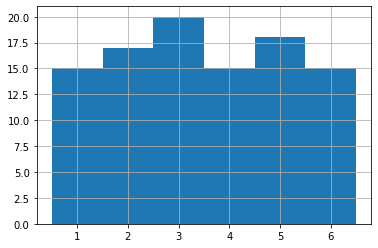

In [25]:
import pandas as pd
pd.Series(dice).hist(bins = np.arange(0.5, 7))

### describe

통계량을 구해보자. describe()는 **기술통계량** 평균, 최소값, 최대값, 표준편차, 건수를 출력한다.
DataFrame 또는 컬럼을 Series로 변환한 후 describe()를 적용할 수 있다.

In [26]:
import pandas as pd

s=pd.Series(dice)

In [27]:
print (s.describe())

count    100.000000
mean       3.490000
std        1.666636
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max        6.000000
dtype: float64


## S.5 정규분포

정규분포는 평균을 중심으로 데이터가 집중해 있고, **좌우대칭의 종모양으로 생긴 분포**를 말한다.
키, 몸무게, 온도 등 많은 데이터가 정규분포를 따르고 있다. 정규분포를 가정하여 데이터를 검증하며, 차이가 유의한지 판별하기도 한다.

### 샘플링

무작위 변수 x가 있다고 하자. x는 정규분포를 따른다고 하며,
평균 $\mu$, 표준편차 $\sigma$를 가지게 된다.
즉, $ X \sim N (\mu, \sigma)$
무작위 수를 생성하는 함수는:
* random.gauss($\mu, \sigma$)
* random.normalvariate($\mu, \sigma$) - gauss보다 약간 빠름.

참고로 다른 분포에서의 샘플링 함수는 다음과 같다.
* random.uniform(a,b)
* random.betavariate(alpha,beta)
* random.expovariate(lamdb)
* random.gammavariate(alpha,beta)


평균 0, 표준편차 1을 가지는 정규분포에서 200개 샘플을 추출해보자.

In [12]:
import numpy as np
comp1=np.random.normal(0, 1, size=200)

200개를 생성하였고, 이 가운데 5개를 출력해보자.

In [13]:
comp1[:5]

array([-0.43093059,  1.64044467, -0.70345805, -1.96556949,  0.35600745])

이번에는 평균 10, 표준편차 2, 샘플은 200의 정규분포를 생성해보자.

In [14]:
comp2=np.random.normal(10, 2, size=200)

### 히스토그램

정규분포에서 무작위 샘플을 추출하는 randn()을 사용해서 histogram 그래프를 그려보자.
정규분포 샘플을 무작위로 100개 생성해보자.

In [61]:
x=np.random.randn(100)

histogram은 bin(interval)과 bin에 속하는 값을 반환한다.
```histogram(x)```를 실행하면 2개의 행렬이 반환된다.

In [63]:
count, binends = np.histogram(x)

반환된 각 빈(간격)에 속한 갯수, 그리고 x축의 간격을 출력해보자.

In [64]:
print(count)
print(binends)

[ 2  0  4 11 18 24 24 12  4  1]
[-3.43964174 -2.81988539 -2.20012905 -1.5803727  -0.96061635 -0.34086
  0.27889635  0.8986527   1.51840905  2.1381654   2.75792174]


numpy의 ```histogram()```은 그래프를 생성하지 않으므로,
그림을 그리려면 ```hist(x)```를 실행한다.

(array([ 2.,  0.,  4., 11., 18., 24., 24., 12.,  4.,  1.]),
 array([-3.43964174, -2.81988539, -2.20012905, -1.5803727 , -0.96061635,
        -0.34086   ,  0.27889635,  0.8986527 ,  1.51840905,  2.1381654 ,
         2.75792174]),
 <a list of 10 Patch objects>)

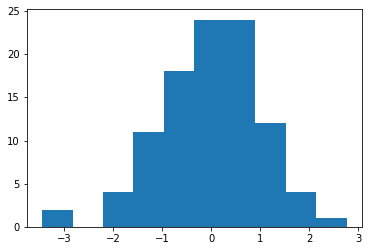

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(x)

Pandas로 hist()를 그려보자.
앞서 생성했던 comp1, comp2를 묶어서 하나의 Series로 만들어 hist()를 호출하고 있다.

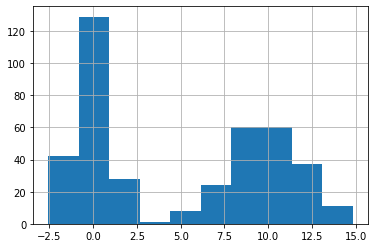

In [7]:
import pandas as pd

values=pd.Series(np.concatenate( [comp1,comp2]))
values.hist()

Pandas의 plot()은 선그래프를 그려준다.
좌측은 평균 0, 표준편차 1이고, 우측은 평균 10, 표준편차 2의 그래프이다.
당연히 표준편차가 큰 우측 그래프의 변동폭이 더 크다. 

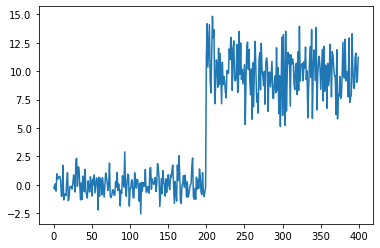

In [8]:
values.plot()
plt.show()

## 문제 S-1: 년도별 빈도 히스토그램

빈도와 날자가 저장된 데이터에서 막대그래프를 그려보자.
아래 데이터의 첫 컬럼은 빈도, 둘째 컬럼은 날자이다.
막대그래프는 histogram, barchart를 선택할 수 있다.
* histogram은 한 변수(컬럼)의 빈도수.
* barchart는 두 변수간의 그래프.

여기서는 x축에 년도, y축은 빈도를 추출해서 barchart를 그려보자.

In [10]:
data = """30 14-11-2003
10 15-03-2004
12 04-12-2012
33 09-05-2007
44 16-08-2005
55 25-07-2001
76 31-12-2011
87 25-06-2009
118 16-02-2006
119 10-02-2000
145 03-05-2014"""

In [11]:
import datetime

yvalues = []
xdates = []
for line in data.split("\n"):
    x, y = line.split()
    yvalues.append(int(x))
    xdates.append(datetime.datetime.strptime(y, "%d-%m-%Y").date())

- L3 ~ 4: 변수가 리스트라고 선언한다.
- L5: split("\n") 라인별로 분리한다.
- L6: 공백으로 분리, x는 빈도, y는 일월년을 저장한다.
- L8: 일월년 형식의 데이터를 객체로 만든다

bar()는 바의 너비를 말하는데, 기본은 0.8이다.
여기서는 30정도 넣으니 출력이 된다.

<BarContainer object of 11 artists>

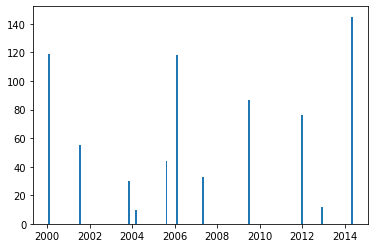

In [12]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
ax.bar(xdates, yvalues, width=30)

## S.6 중심극한정리

평균이 $\mu$, 표준편차가 $\sigma$인 모집단이 있다고하자. 이 모집단에서 무작위로 표본 $X_1, X_2, \dots X_n$을 추출하면 (바꿔치기가 가능한 sampling with replacement), 그 표본의 평균 $\bar{X_1}, \bar{X_2}, \dots \bar{X_n}$은 **정규분포**를 따른다는 것이 중심극한정리이다.

모집단이 어떤 분포를 따르더라도, 표본의 크기 n이 충분히 커지면 (보통 n>30), **표본평균의 분포는 정규분포로 수렴**하게 된다
이러한 전제에 따라, **통계적 추정**을 할 수 있고, z값을 이용해 확률을 계산할 수 있게 된다.

예를 들어 모집단이 균등분포라고 하자. 앞서 설명했던 주사위는 1 ~ 6까지 동일한 확률로 발생한다. 주사위를 10회 던져서 표본을 구성해보자. 이를 표본1이라고 하자. 이와 같이 표본을 n회 구성해보자. 그러면 표본1의 평균 $\bar{X_1}$ 3.51, $\bar{X_2}$는 3.32, $\bar{X_3}$은 3.81..이 될 것이다. 표본을 30회 정도하면, 표본평균의 표본분포 (sampling distribution of sample means)는 그 형태가 정규분포에 수렴한다.

무작위로 **평균 $\mu$, 표준편차 $\sigma$** 모집단이 있다고 하자. 모집단의 평균과 표준편차는 계산할 방법이 없어서 알 수가 없다. 표본을 추출하면, 모집단의 평균 $\mu = \mu_{\bar{x_n}}$, 모집단의 표준편차는 표본의 표준편차를 크기로 나누어 계산할 수 있다 $\sigma =  \frac{\sigma}{\sqrt{n}}$  따라서 $\frac{\sigma} {\sqrt{n}}$로 계산한다. 주사위 사례에서 n=10이므로,  $\frac{\sigma} {\sqrt{10}}$으로 한다.

식으로 표현하면:

$$
z = \frac {\bar{x_n} - \mu} {\sigma / \sqrt{n}} \quad n \rightarrow \infty
$$

정규분포에서 100개의 수를 생성해보자.

In [13]:
import numpy as np
x=np.random.randn(100)

정규분포는 평균, 모드, 최빈값이 같아야 한다.
아래는 평균은 0에 가깝고, 최빈값과 다소 차이가 있다.
정규분포의 솟거나, 퍼진 모양이 다르기 때문이다.

In [14]:
print ("mean\t: {}".format(np.mean(x)))
print ("median\t: {}".format(np.median(x)))

mean	: 0.024503244239586257
median	: -0.060579283628489466


### skewness

분포의 대칭성을 설명하는 지표로 skewness를 계산한다.
* ```= 0``` : 정규분포
* ```> 0``` : +이면 +방향으로 꼬리가 있다. 왼쪽으로 피크가 있다.
* ```< 0``` : -이면 -방향으로 꼬리가 있다. 오른쪽으로 피크가 있다.

In [5]:
from scipy.stats import skew

print ("skewness\t: {}".format(skew(x)))

skewness	: 0.038407737346556746


### kurtosis

kurtosis는 분포의 뾰족한 정도를 설명한다.
* ```= 0``` : 정규분포
* ```> 0``` : 뾰족하고, 꼬리가 두툼
* ```< 0``` : 편평하고, 꼬리가 얇음

In [6]:
from scipy.stats import kurtosis

print ("kurtosis\t: {}".format(kurtosis(x)))

kurtosis	: -0.03424153596399471


### Spark로 skewness, kurtosis 계산하기

In [15]:
import os

os.environ["PYSPARK_PYTHON"]="/usr/bin/python3"
os.environ["PYSPARK_DRIVER_PYTHON"]="/usr/bin/python3"

In [2]:
import pyspark

myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

numpy array는 바로 Spark DataFrame을 생성할 수 없으므로,
Pandas를 경유해서 numpy array를 DataFrame으로 생성하자.

In [5]:
import pandas as pd
xPd=pd.DataFrame(x, columns=['x'], dtype=float)

In [6]:
df=spark.createDataFrame(xPd)

In [7]:
from pyspark.sql import functions as f
df.select(f.skewness(df['x']), f.kurtosis(df['x'])).show()

+-------------------+-------------------+
|        skewness(x)|        kurtosis(x)|
+-------------------+-------------------+
|0.04266616939228724|-0.5887178923080336|
+-------------------+-------------------+



## S.7 분산

분산을 구하려면 평균 $\bar{x}$, $\bar{y}$를 구해야 한다.

### 평균 계산식

평균을 x의 합계를 개수로 나누어 계산해보자. numpy 평균과 동일하다.

In [8]:
X=x

In [9]:
print ("simple mean of x = {:.3f}".format(float(sum(X))/len(X)))

simple mean of x = 0.096


### numpy 평균

numpy의 평균을 계산해보자.

In [10]:
import numpy as np

xbar=np.mean(X)
#ybar=np.mean(Y)

In [11]:
print ("numpy mean of X = {:.3f}".format(xbar))

numpy mean of X = 0.096


### 분산 계산식

분산 variance나 표준편차 Standard Deviation은 **평균으로부터 얼마나 멀리 떨어져 또는 흩어져 분포**하는지 알려주는 값이다. 
* 분산은 평균에서 관측값을 뺀 차이값을 제곱한 후, n으로 나누어 평균을 계산한다. 제곱을 하지 않고 차이값을 더하면 0이 나오므로 제곱을 한다.
* 분산을 제곱근하면 표준편차가 된다.

분산보다는 표준편차가 더 자주 사용된다.

수식으로 분산을 계산을 해보자.

In [12]:
print(np.sqrt(sum( [ (x-xbar)**2 for x in X ] )/len(X))) # ddof=0

0.9088549333803019


n-1 보정을 해주어서 분산을 계산하면 다음과 같이 미세하게 값이 증가한다.
이러한 보정은 샘플의 크기가 커지면 영향이 더욱 적어지게 된다.

**n-1 보정을 해주어야 하는 이유**는 모집단이 아니라, 표본분산을 계산하고, 하나는 제외해도 되기 때문이다.

표본분산을 계산하려면 표본평균을 알아야 한다. 분산이란 평균에서 얼마나 떨어져 있는지 나타내는 값이기 때문이다.

모집단에서 5개의 수를 샘플링한다고 하자. 예를 들어 1, 5, 3, 4, 9이라고 하자.

표본의 평균을 알고 있다고 하자. 그러면 1, 5, 3, 4까지만 샘플링을 해도 평균이 4.4 (22/5)이니까
**분산을 계산할 때 마지막 수는 필요하지 않아서 자유도에서 -1**을 해주게 된다.

표본의 평균을 알고 있다면, 마지막 수는 변경될 필요없이 고정된다.

In [13]:
print(np.sqrt(sum( [ (x-xbar)**2 for x in X ] )/(len(X)-1))) # ddof=1

0.9134335766320952


표준편차는 variance의 제곱근으로 계산한다.

ddof는 Delta Degrees of Freedom으로, 기본 값은 ddof=0이지만, 1로 해서 계산한다.

In [14]:
sx=np.sqrt(np.var(X,ddof=1))
#sy=np.sqrt(np.var(Y,ddof=1))
#print("sx:",sx, "sy:",sy)

### numpy 분산 계산

numpy로 계산해도, 값은 동일하다.

In [15]:
print(np.std(X)) # ddof=0
print(np.std(X, ddof=1))

0.9088549333803018
0.9134335766320952


In [16]:
a = np.array([1,2,3,4,5])
p = np.percentile(a, 50) # return 50th percentile, e.g median.
print (p) # 3


3.0


### boxplot

전체 관측값을 정렬하고, 전체를 4분위로 나누면 IQR Interquatile Range을 구할 수 있다.
Boxplot은 IQR의 Q1~Q3을 사각형으로 표시한다.
pandas를 이용하거나, matplotlib으로 Boxplot을 그릴 수 있다.
사각형의 주황색 선은 평균을 말한다.

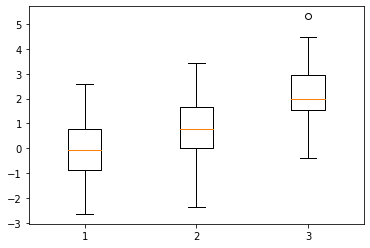

In [18]:
import matplotlib.pyplot as plt

x1 = np.random.normal(0,1,50) # mu=0, sigma=1, n=50
x2 = np.random.normal(1,1,50)
x3 = np.random.normal(2,1,50)
plt.boxplot([x1,x2,x3])
plt.show()


## S.8 zscore, tscore

zscore는 각 측정 값을 평균에서 빼고난 후 표준편차로 나누어 계산된다.
이 식을 이해하면, 평균에서 표준편차의 몇 배가 떨어져 있는지를 말한다.
**표준편차의 배수로 떨어진 정도를 정규화(표준화)**한다는 의미가 있다.

z는 모집단의 평균, 표준편차를 알 경우, 그러나 샘플링을 할 경우는 
n-1로 나눈다 (numpy에서는 ddof=1이 default).
따라서 아래 계산에서는 ddof=1로 한다.

모집단의 zscore when variance is known
$$
z = \frac {\bar{x_n} - \mu} {\sigma / \sqrt{n}} 
$$


In [20]:
X=[10, 7, 12, 12, 9, 16, 12, 18, 8, 12, 14, 16]

### zscore 계산식

In [79]:
import numpy as np

xbar=np.mean(X)
sigmax=np.std(X) #ddof=0
sx=np.std(X,ddof=1)
for x in X:
    #zscore=(x-xbar)/sx
    zscore=(x-xbar)/sigmax
    print (zscore, end= ' ')

-0.669534063411986 -1.5965812281362746 -0.05150262026246029 -0.05150262026246029 -0.9785497849867488 1.184560266036591 -0.05150262026246029 1.8025917091861168 -1.2875655065615117 -0.05150262026246029 0.5665288228870654 1.184560266036591 

### stats zscore

zscore()는 scipy.stats에서 제공하고 있다.

In [43]:
from scipy import stats

In [23]:
stats.zscore(X)

array([-0.66953406, -1.59658123, -0.05150262, -0.05150262, -0.97854978,
        1.18456027, -0.05150262,  1.80259171, -1.28756551, -0.05150262,
        0.56652882,  1.18456027])

### cdf

추론통계에서 확률을 계산하는 것은 중요하다. p-value와 신뢰구간의 계산에 필요하다.
**cdf** Cumulative Distribution Function은 누적확률을 의미한다.
정규분포에서 **평균 loc=0, 표준편차 scale=1을 기본 값**으로, cdf(0)은 '0'또는 그 이하의 값을 누적한 확률을 말한다.

In [80]:
from scipy.stats import norm

norm.cdf(0, loc=0, scale=1)

0.5

1일 경우는 84.13, 2일 경우에는 97.72이다.
* $\mu \pm 1\sigma$ 모집단 68.27%
* $\mu \pm 2\sigma$ 모집단 95.45%
* $\mu \pm 3\sigma$ 모집단 99.73%

In [81]:
norm.cdf(1) - norm.cdf(-1)

0.6826894921370859

In [82]:
norm.cdf(2) - norm.cdf(-2)

0.9544997361036416

### ppf

Percent Point Function 확률의 점 값을 계산한다. 0.5, 즉 50% 확률의 zscore는 0이다.
0.001, 즉 0.1%의 확률의 zscore는 -3.09이다.

In [27]:
norm.ppf([0.001, 0.5, 0.9545])

array([-3.09023231,  0.        ,  1.69014614])

ppf는 cdf의 역이다. 아래와 같이 위 ppf계산 결과를 cdf에 넣으면 ppf를 계산할 수 있다.

In [83]:
norm.cdf([-3.09023231,  0.        ,  1.69014614])

array([0.001 , 0.5   , 0.9545])

### tscore

표본의 크기가 크면 모집단과 차이가 없는데, 표본이 작으면 어떻게 될까? 이 경우 사용하는 것이 t분포이다.
t분포는 정규분포와 유사한 모양을 가지고 있지만, 꼬리가 두툼한 특징을 가지고 있다.
따라서 평균에서 멀어진 값을 샘플링할 확률이 높아지게 된다.
n이 일정 규모로 커지면 t분포와 정규분포와 유사하게 된다.

scipy.stats.t.cdf(1, 1, loc=0, scale=1)는 t-분포의 CDF (Cumulative Distribution Function, 누적 분포 함수)를 계산한다.

- 1: 계산할 CDF의 값에 해당하는 t-값
- 1: 자유도(degree of freedom) dof=1
- 평균 loc=0
- 표준편차 scale=1

In [86]:
t.cdf(1, 1, loc=0, scale=1)

0.7500000000000002

평균 loc=0, 표준편차 scale=1는 기본값이라 생략할 수 있다.

In [85]:
from scipy.stats import t

t.cdf(1, 1) # dof 1

0.7500000000000002

## S.9 outliers

정규분포를 따른다고 했을 경우, 분포의 표준편차 범위 -3 ~ 3안에 99.7%가 포함되고 그 밖의 값은 0.3%에 불과하여 발생하기 극히 어렵다.
이러한 일정 범위를 넘어선 값은 이상값이다.

이상값은 분석에 영향을 미치며, 몸무게-키의 회귀분석선을 생각해보면 이상 몸무게는 선을 틀어지게 한다.

따라서, 이런 경우 분석에 앞서:
* 이상값의 어떤 기준은 판별하는가?
* 왜 그런 값이 발생했는지, 올바르지 않은 입력인지 판단한다.
* 이상값을 제외하고 나면 통계량은 어떻게 변하는지 알아본다.

아래의 예에서 표준편차 2배 보다 큰 경우 이상 값으로 보고, 제외한다.

In [30]:
import numpy as np

def filterOutliers(data):
    m = np.mean(data)
    s = np.std(data)
    filtered = [d for d in data if (m - 2 * s < d < m + 2 * s)]
    return filtered

d = [2,4,5,1,6,5,40]
filtered_d = filterOutliers(d)
print (filtered_d)

[2, 4, 5, 1, 6, 5]


## Window functions

window 함수는 윈도우를 정의하고 윈도우 함수를 적용하는 데 사용된다.

얼핏 groupBy가 떠올려질텐데, groupBy는 컬럼별 연산이고 컬럼데이터 그룹화와 집계에 사용되며 범주형 데이터를 처리하는 데 유용하다. 반면에 window는 윈도우 함수를 사용하여 행 별로 연산을 수행하고 시간적 또는 순서적 데이터에 적합하다.

윈도우 함수는 윈도우별 일종의 집단으로 구분하고 (partitionBy) 그 범위 내에서 계산을 할 때 사용한다.
이 때 over() 함수로 적용되는 그룹의 윈도우를 구분하게 된다.

* 순위 함수 ranking functions: rank, dense_rank, percent_rank, ntile, row_number
* 분석 함수 analytic functions: cume_dist, first_value, last_value, lag, lead
* 집합 함수 aggregate functions: sum, avg, min, max, count와 같이 앞서 배웠던 집합 함수를 윈도우에 대해 적용.

### 데이터

문자열 리스트의 1차원 배열이지만, 2차원 배열로 즉 사람별로 이름, 과목, 성적을 가지는 2차원으로 변환해야 한다.
윈도우 함수를 적용하기 위해 DataFrame으로 만들어 주자.

In [5]:
marks=[
    "김하나, English, 100",
    "김하나, Math, 80",
    "임하나, English, 70",
    "임하나, Math, 100",
    "김갑돌, English, 82.3",
    "김갑돌, Math, 98.5"
]

### DataFrame 생성

이름, 과목, 성적을 컴마로 분할하여 DataFrame을 직접 만들려면 조금 복잡하다.
이름, 과목, 성적을 하나의 컬럼으로 읽게되고, 이를 컴마로 분리해서 하나씩의 컬럼을 생성해야 한다.
RDD의 map() 함수를 사용하여 컴마로 분할하고 나서, 3개의 컬럼으로 DataFrame을 만드는 편이 쉽다.

In [6]:
_marksRdd=spark.sparkContext.parallelize(marks).map(lambda x:x.split(','))

읽으면서 컬럼명을 수정한다.

In [7]:
_marksDf=spark.createDataFrame(_marksRdd, schema=["name", "subject", "mark"])

In [8]:
_marksDf.printSchema()

root
 |-- name: string (nullable = true)
 |-- subject: string (nullable = true)
 |-- mark: string (nullable = true)



In [9]:
_marksDf.show()

+------+--------+-----+
|  name| subject| mark|
+------+--------+-----+
|김하나| English|  100|
|김하나|    Math|   80|
|임하나| English|   70|
|임하나|    Math|  100|
|김갑돌| English| 82.3|
|김갑돌|    Math| 98.5|
+------+--------+-----+



In [9]:
_marksDf.groupBy('subject').count().show()

+--------+-----+
| subject|count|
+--------+-----+
|    Math|    3|
| English|    3|
+--------+-----+



### 그룹 window

컬럼에 대해 그룹, 즉 윈도우를 만드는 함수를 보자. 
* partitionBy: 컬럼별로 구분, 즉 컬럼 값에 따라 partition에 포함되는 행을 할당. partition을 정하지 않으면 모든 행을 동일한 노드에 할당한다.
* orderBy: partition 내에서 컬럼 값에 대해 행의 순서를 정렬한다.
* frame: 현재 행을 기준으로 포함할 행을 분할.
    * 행 프레임: 현재 행을 기준으로 몇 개 앞, 몇 개 뒤의 물리적 범위를 **```window.rowsBetween(start, end)```** 정한다.
    * 범위 프레임: 논리적인 범위를 **```windowSpec.rangeBetween(start, end)```** 정한다. 현재 성적이 70점이면 RANGE BETWEEN 20 PRECEDING AND 10 FOLLOWING은 50 ~ 80을 의미 

In [10]:
from pyspark.sql.window import Window

win = Window.partitionBy("subject").orderBy("mark")

### 순위 함수

#### row_number

row_number() 윈도우 함수는 각 그룹별로 일련번호를 생성한다.

In [11]:
from pyspark.sql.functions import row_number

_marksDf.withColumn("row_number", row_number().over(win)).show()

+------+--------+-----+----------+
|  name| subject| mark|row_number|
+------+--------+-----+----------+
|임하나|    Math|  100|         1|
|김하나|    Math|   80|         2|
|김갑돌|    Math| 98.5|         3|
|김하나| English|  100|         1|
|임하나| English|   70|         2|
|김갑돌| English| 82.3|         3|
+------+--------+-----+----------+



위 결과를 보면 정렬이 되지 않고 있다.
Math의 mark를 보면 100, 80, 98.5의 순서로 내림차순으로 올바르지 않다.
그 이유는 mark가 문자열로 정의되어 있기 때문이다.
어떻게 해야 할까? FloatType()으로 형변환을 하고, 다시 Window를 정렬하자.

In [23]:
from pyspark.sql.types import FloatType

_marksDf = _marksDf.withColumn('markF', _marksDf['mark'].cast(FloatType()))

```orderBy(("markF").desc())```로 내림차순으로 정렬하여 Window를 정렬한다.

In [24]:
from pyspark.sql import functions as F
winF = Window.partitionBy("subject").orderBy(F.col("markF").desc()) # orderby 'float markF'

In [25]:
from pyspark.sql.functions import row_number

_marksDf.withColumn("row_number", row_number().over(winF)).show()

+------+--------+-----+-----+----------+
|  name| subject| mark|markF|row_number|
+------+--------+-----+-----+----------+
|임하나|    Math|  100|100.0|         1|
|김갑돌|    Math| 98.5| 98.5|         2|
|김하나|    Math|   80| 80.0|         3|
|김하나| English|  100|100.0|         1|
|김갑돌| English| 82.3| 82.3|         2|
|임하나| English|   70| 70.0|         3|
+------+--------+-----+-----+----------+



#### rank

rank() 윈도우 함수는 각 그룹별로 등위를 계산한다.

In [26]:
from pyspark.sql.functions import rank

_marksDf.withColumn("rank", rank().over(winF)).show()

+------+--------+-----+-----+----+
|  name| subject| mark|markF|rank|
+------+--------+-----+-----+----+
|임하나|    Math|  100|100.0|   1|
|김갑돌|    Math| 98.5| 98.5|   2|
|김하나|    Math|   80| 80.0|   3|
|김하나| English|  100|100.0|   1|
|김갑돌| English| 82.3| 82.3|   2|
|임하나| English|   70| 70.0|   3|
+------+--------+-----+-----+----+



### 분석 함수

#### cume_dist()

cume_dist() 윈도우 함수는 누적 분포 값을 출력한다.

In [27]:
from pyspark.sql.functions import cume_dist

_marksDf.withColumn("cume_dist", cume_dist().over(winF)).show()

+------+--------+-----+-----+------------------+
|  name| subject| mark|markF|         cume_dist|
+------+--------+-----+-----+------------------+
|임하나|    Math|  100|100.0|0.3333333333333333|
|김갑돌|    Math| 98.5| 98.5|0.6666666666666666|
|김하나|    Math|   80| 80.0|               1.0|
|김하나| English|  100|100.0|0.3333333333333333|
|김갑돌| English| 82.3| 82.3|0.6666666666666666|
|임하나| English|   70| 70.0|               1.0|
+------+--------+-----+-----+------------------+



In [28]:
from pyspark.sql.functions import lag

_marksDf.withColumn("lag", lag('mark', 1).over(winF)).show()

+------+--------+-----+-----+-----+
|  name| subject| mark|markF|  lag|
+------+--------+-----+-----+-----+
|임하나|    Math|  100|100.0| null|
|김갑돌|    Math| 98.5| 98.5|  100|
|김하나|    Math|   80| 80.0| 98.5|
|김하나| English|  100|100.0| null|
|김갑돌| English| 82.3| 82.3|  100|
|임하나| English|   70| 70.0| 82.3|
+------+--------+-----+-----+-----+



In [29]:
from pyspark.sql.functions import lead

_marksDf.withColumn("lead", lead('mark', 1).over(winF)).show()

+------+--------+-----+-----+-----+
|  name| subject| mark|markF|  lag|
+------+--------+-----+-----+-----+
|임하나|    Math|  100|100.0| 98.5|
|김갑돌|    Math| 98.5| 98.5|   80|
|김하나|    Math|   80| 80.0| null|
|김하나| English|  100|100.0| 82.3|
|김갑돌| English| 82.3| 82.3|   70|
|임하나| English|   70| 70.0| null|
+------+--------+-----+-----+-----+



### Aggregate Functions

합계, 최대, 최소와 같은 그룹으로 묶어 계산하는 경우, 정렬할 필요가 없다.
즉 partitionBy() 하면서, orderBy()는 하지 않는다.

mark가 string으로 설정되어 있다고 평균, 합계, 최소, 최대 함수가 어떻게 출력될까? 문제 없이 실행되지만, 결과는 올바르지 않다. 데이터타입은 항상 주의해야 한다.

In [30]:
winAgg  = Window.partitionBy("subject")

In [31]:
from pyspark.sql import functions as F
_marksDf.withColumn("avg", F.avg(F.col("markF")).over(winAgg))\
    .withColumn("sum", F.sum(F.col("markF")).over(winAgg))\
    .withColumn("min", F.min(F.col("markF")).over(winAgg))\
    .withColumn("max", F.max(F.col("markF")).over(winAgg))\
    .show()

+------+--------+-----+-----+-----------------+-----------------+----+-----+
|  name| subject| mark|markF|              avg|              sum| min|  max|
+------+--------+-----+-----+-----------------+-----------------+----+-----+
|김하나|    Math|   80| 80.0|92.83333333333333|            278.5|80.0|100.0|
|임하나|    Math|  100|100.0|92.83333333333333|            278.5|80.0|100.0|
|김갑돌|    Math| 98.5| 98.5|92.83333333333333|            278.5|80.0|100.0|
|김하나| English|  100|100.0|84.10000101725261|252.3000030517578|70.0|100.0|
|임하나| English|   70| 70.0|84.10000101725261|252.3000030517578|70.0|100.0|
|김갑돌| English| 82.3| 82.3|84.10000101725261|252.3000030517578|70.0|100.0|
+------+--------+-----+-----+-----------------+-----------------+----+-----+



## 문제: zscore, cdf 계산

성적데이터는 n이 적지만, 정규분포를 이룬다고 가정하자.
* 1) 성적데이터로 DataFrame을 생성.
* 2) zscore 컬럼을 생성.
zscore를 계산하려면, 평균과 표준편차를 알아야 한다.
계산식에 F함수를 직접 사용하면 오류가 발생한다. 따로 평균과 표준편차를 구해서 계산식에서 사용해야 한다.
* 3) cdf 컬럼을 생성.
scipy.stats.norm.cdf() 함수는 데이터타입을 float로 맞추어 주어야 한다.
cdf는 평균=0, 표준편차=1을 기본 값으로 누적확률을 계산한다.

### 데이터

앞서 사용했던 점수데이터를 사용하자.

In [87]:
marks=[
    "김하나, English, 100",
    "김하나, Math, 80",
    "임하나, English, 70",
    "임하나, Math, 100",
    "김갑돌, English, 82.3",
    "김갑돌, Math, 98.5"
]

### DataFrame 생성

배열내에 문자열을 가지고 있는 경우, 바로 DataFrame으로 만들면 따옴표로 묶인 문자열이 한 값이 된다.
앞서와 같이 RDD를 만들어 주고 map() 함수로 분리한 후 DataFrame을 만들어준다.

In [88]:
_marksRdd=spark.sparkContext.parallelize(marks).map(lambda x:x.split(','))

In [89]:
_marksDf=spark.createDataFrame(_marksRdd, schema=["name", "subject", "mark"])

스키마를 자동유추하면, mark 마저도 string으로 읽어온다. 소수점으로 변환이 필요하다.

In [90]:
_marksDf.printSchema()

root
 |-- name: string (nullable = true)
 |-- subject: string (nullable = true)
 |-- mark: string (nullable = true)



### 데이터 타입 변경

점수를 형변환 해보자.

In [91]:
from pyspark.sql.types import FloatType

# _marksDf = _marksDf.withColumn('markF_', F.expr("CAST(mark AS FLOAT)"))  # ok
_marksDf = _marksDf.withColumn('markF', _marksDf['mark'].cast(FloatType()))

### F.mean, F.stddev를 사용하면 zscore계산 오류

stats.zscore() 함수는 **배열을 입력**받아서 zscore를 계산한다.
점수는 Column 데이터이라서, 배열로 변환해서 넘겨주려면 번거롭다.

zscore를 계산하려면, 평균과 표준편차를 알아야 한다.
전체에 대한 평균을 계산하고, 이를 각 mark에 적용하는 계산식을 사용해 보자.
이 때 F.mean(), F.stddev() 함수를 사용하면 오류가 발생한다.

```python
zscoreUdf = F.udf(lambda x: (x-F.mean(x))/F.stddev) # does not work
```

### mean, stdev를 별도 계산해서 zscore 계산

평균과 표준편차를 먼저 구하고 계산식에 넣어주자.
컬럼명은 아래와 같이 따옴표로 혹은 ```F.col('markF')```로 넣어주어도 된다.


In [92]:
from pyspark.sql import functions as F

_markStats = _marksDf.select(
    F.mean('markF').alias('mean'),
    F.stddev('markF').alias('std')
).collect()

In [93]:
_markStats

[Row(mean=88.46666717529297, std=12.786190172956093)]

In [94]:
meanMark = _markStats[0]['mean']
stdMark = _markStats[0]['std']

In [95]:
meanMark

88.46666717529297

 또는 2차원 인덱스를 사용하여 평균을 읽어도 된다.

In [96]:
_markStats[0][0]

88.46666717529297

In [97]:
stdMark

12.786190172956093

zscore를 계산하려면, FloatType으로 형변환 해준다.

In [98]:
#from scipy import stats
from pyspark.sql import functions as F
from pyspark.sql.types import FloatType

zscoreUdf = F.udf(lambda x: (x-meanMark)/stdMark, FloatType()) # return as FloatType 

In [99]:
_marksDf=_marksDf.withColumn("zscore", zscoreUdf(_marksDf['markF']))

In [100]:
_marksDf.show()

+------+--------+-----+-----+-----------+
|  name| subject| mark|markF|     zscore|
+------+--------+-----+-----+-----------+
|김하나| English|  100|100.0|  0.9020148|
|김하나|    Math|   80| 80.0| -0.6621728|
|임하나| English|   70| 70.0| -1.4442666|
|임하나|    Math|  100|100.0|  0.9020148|
|김갑돌| English| 82.3| 82.3|-0.48229098|
|김갑돌|    Math| 98.5| 98.5| 0.78470075|
+------+--------+-----+-----+-----------+



### cdf 계산

norm.cdf는 numpy.float64를 반환하는데, spark에서 사용하지 않는 데이터타입이다. float()로 형변환을 해주자.

In [101]:
from scipy.stats import norm
type(norm.cdf(1))

numpy.float64

In [102]:
from pyspark.sql import functions as F
from pyspark.sql.types import FloatType

#bad_norm_cdf = F.udf(lambda x: norm.cdf(x), FloatType()) # FloatType() does not work
normCdf = F.udf(lambda x: float(norm.cdf(x))) # FloatType() does not work

#### 원점수를 사용하면 1.0

cdf는 평균=0, 표준편차=1을 기본 값으로 누적확률을 계산한다.
점수가 그런 범위에 있지 않고 훨씬 넘어가므로 1.0이 계산된다.

In [103]:
_marksDf.withColumn("cdf", normCdf(_marksDf['markF'])).show()

+------+--------+-----+-----+-----------+---+
|  name| subject| mark|markF|     zscore|cdf|
+------+--------+-----+-----+-----------+---+
|김하나| English|  100|100.0|  0.9020148|1.0|
|김하나|    Math|   80| 80.0| -0.6621728|1.0|
|임하나| English|   70| 70.0| -1.4442666|1.0|
|임하나|    Math|  100|100.0|  0.9020148|1.0|
|김갑돌| English| 82.3| 82.3|-0.48229098|1.0|
|김갑돌|    Math| 98.5| 98.5| 0.78470075|1.0|
+------+--------+-----+-----+-----------+---+



#### zscore를 사용하여 cdf 계산

zscore를 사용하여 cdf()를 계산하자.

In [104]:
_marksDf=_marksDf.withColumn("cdf", normCdf(_marksDf['zscore']))

In [105]:
_marksDf.show()

+------+--------+-----+-----+-----------+-------------------+
|  name| subject| mark|markF|     zscore|                cdf|
+------+--------+-----+-----+-----------+-------------------+
|김하나| English|  100|100.0|  0.9020148| 0.8164754981807292|
|김하나|    Math|   80| 80.0| -0.6621728| 0.2539302463290559|
|임하나| English|   70| 70.0| -1.4442666| 0.0743320011235712|
|임하나|    Math|  100|100.0|  0.9020148| 0.8164754981807292|
|김갑돌| English| 82.3| 82.3|-0.48229098|0.31479962882028223|
|김갑돌|    Math| 98.5| 98.5| 0.78470075| 0.7836854740814176|
+------+--------+-----+-----+-----------+-------------------+



### Window 함수를 사용하여 zscore 계산

전체에 대한 평균점수를 컬럼으로 만드려면 Window 기능을 사용해야 한다.

#### 전체 Window

점수평균이라고 하면, Spark는 어떤 평균인지 모른다.
사람별 점수평균인지, 과목별평균인지 알려주어야 한다.
정작 우리가 필요한 것은 전체점수의 평균이다.
```rowsBetween(-sys.maxsize, sys.maxsize)```는 최대, 최소 값으로 윈도우를 정한다.

In [106]:
import sys

byAll = Window.rowsBetween(-sys.maxsize, sys.maxsize)

#### 전체의 평균, 표준편차 컬럼을 만들고 계산

전체 Window에 대해 평균, 표준편차와 과목별 평균을 계산해보자.
이 때 평균, 표준편차를 컬럼으로 만든 후에 zscore를 계산해보자.

In [107]:
from pyspark.sql import functions as F
_marksDf = _marksDf.withColumn("mean", F.avg(_marksDf['markF']).over(byAll))

In [108]:
_marksDf = _marksDf.withColumn("stddev", F.stddev(_marksDf['markF']).over(byAll))

과목별 평균은 직접 zscore 계산에 필요하지 않지만 덤으로 추가한다.

In [109]:
from pyspark.sql.window import Window

bySubject = Window.partitionBy('subject')
_marksDf = _marksDf.withColumn("meanBySubject", F.avg(_marksDf['markF']).over(bySubject))

In [110]:
_marksDf.show(_marksDf.count(), truncate=False)

+------+--------+-----+-----+-----------+-------------------+-----------------+------------------+-----------------+
|name  |subject |mark |markF|zscore     |cdf                |mean             |stddev            |meanBySubject    |
+------+--------+-----+-----+-----------+-------------------+-----------------+------------------+-----------------+
|김하나| English| 100 |100.0|0.9020148  |0.8164754981807292 |88.46666717529297|12.786190172956093|84.10000101725261|
|임하나| English| 70  |70.0 |-1.4442666 |0.0743320011235712 |88.46666717529297|12.786190172956093|84.10000101725261|
|김갑돌| English| 82.3|82.3 |-0.48229098|0.31479962882028223|88.46666717529297|12.786190172956093|84.10000101725261|
|김하나| Math   | 80  |80.0 |-0.6621728 |0.2539302463290559 |88.46666717529297|12.786190172956093|92.83333333333333|
|임하나| Math   | 100 |100.0|0.9020148  |0.8164754981807292 |88.46666717529297|12.786190172956093|92.83333333333333|
|김갑돌| Math   | 98.5|98.5 |0.78470075 |0.7836854740814176 |88.46666717529297|12.

In [111]:
_marksDf = _marksDf.withColumn("zscore1", (F.col('markF')-F.col('mean'))/F.col('stddev'))

In [112]:
_marksDf.select('zscore', 'zscore1').show(_marksDf.count())

+-----------+-------------------+
|     zscore|            zscore1|
+-----------+-------------------+
|  0.9020148|  0.902014804151829|
| -0.6621728| -0.662172786480269|
| -1.4442666| -1.444266581796318|
|  0.9020148|  0.902014804151829|
|-0.48229098|-0.4822909748814927|
| 0.78470075| 0.7847007348544217|
+-----------+-------------------+



#### 전체의 평균, 표준편차 컬럼을 만들지 않고 계산

또는 직접 Window 함수를 직접 사용하여 zscore를 계산할 수도 있다.

In [113]:
_marksDf = _marksDf.withColumn("zscore2", (F.col('markF')-F.avg('markF').over(byAll))/F.stddev('markF').over(byAll))

In [114]:
_marksDf.select('zscore', 'zscore1', 'zscore2').show()

+-----------+-------------------+-------------------+
|     zscore|            zscore1|            zscore2|
+-----------+-------------------+-------------------+
|  0.9020148|  0.902014804151829|  0.902014804151829|
| -0.6621728| -0.662172786480269| -0.662172786480269|
| -1.4442666| -1.444266581796318| -1.444266581796318|
|  0.9020148|  0.902014804151829|  0.902014804151829|
|-0.48229098|-0.4822909748814927|-0.4822909748814927|
| 0.78470075| 0.7847007348544217| 0.7847007348544217|
+-----------+-------------------+-------------------+



## 문제: 2020년 8월 서울시 지하철호선별 역별 승하차 인원 정보

'서울시 지하철호선별 역별 승하차 인원 정보'를 검색하거나,
https://data.seoul.go.kr/dataList/OA-12914/S/1/datasetView.do
사이트를 방문한다. 분석할 파일은 'CARD_SUBWAY_MONTH_202008.csv'이다.
문제를 풀고 결과 출력을 예시해 놓았다. 동일하지 않아도 유사하게 출력하면 된다.

* 1) DataFrame 생성하고, 스키마는 자동인식하여 출력
* 2) 컬럼명을 변경하고, 스키마 출력

```python
root
 |-- dateUse: integer (nullable = true)
 |-- line: string (nullable = true)
 |-- stationID: string (nullable = true)
 |-- station: integer (nullable = true)
 |-- NInPassengers: integer (nullable = true)
 |-- NOutPassengers: integer (nullable = true)
 |-- dateRegi: string (nullable = true)
```

* 3) 일자 형변환

```python
+--------+------+---------+-------+-------------+--------------+--------+----------+
| dateUse|  line|stationID|station|NInPassengers|NOutPassengers|dateRegi|      Date|
+--------+------+---------+-------+-------------+--------------+--------+----------+
|20200801|중앙선|     오빈|    249|          239|      20200804|    null|2020-08-01|
```

* 4) 노선명별 승하차총승객수

```python
+------+------------+------------+
|  line|승차인원합계|하차인원합계|
+------+------------+------------+
|일산선|     2301495|  6262255960|
```

* 5) 노선별 승하차합계가 가장 높은 역을 출력 (모든 노선 출력)

```python
+--------+------+---------+-------+-------------+--------------+--------+----------+--------+
| dateUse|  line|stationID|station|NInPassengers|NOutPassengers|dateRegi|      Date|SumInOut|
+--------+------+---------+-------+-------------+--------------+--------+----------+--------+
|20200807|일산선|     화정|  17591|        17916|      20200810|    null|2020-08-07|20218726|
|20200814|장항선| 온양온천|   4528|         4534|      20200817|    null|2020-08-14|20205351|
|20200807|경부선|   영등포|  43168|        46982|      20200810|    null|2020-08-07|20247792|
+--------+------+---------+-------+-------------+--------------+--------+----------+--------+
```

* 6) 요일별 승하차인원 합계

```python
+---------+-------------+
|dayOfWeek|sum(SumInOut)|
+---------+-------------+
|Wednesday|  47879720822|
```

* 7) 노선별 요일별 승하차인원 합계 (모든 노선 출력)

```python
+------+----------+----------+----------+----------+----------+----------+----------+
|  line|    Friday|    Monday|  Saturday|    Sunday|  Thursday|   Tuesday| Wednesday|
+------+----------+----------+----------+----------+----------+----------+----------+
|일산선| 808395124|1010437381|1010319451|1010235636| 808383940| 808393127| 808392796|
```

* 8) 노선별 요일별 승하차인원 그래프
    * x 축 요일, y축 승하차인원.

### 1) DataFrame 생성

최근 파일을 분석하기로 하자 (역ID만 제거되고 있다).

header=true, delimiter= ',' 설정으로 csv 파일을 읽는다.

In [115]:
_subDf = spark\
    .read\
    .options(header='true', inferschema='true', delimiter=',')\
    .csv(os.path.join('data', 'CARD_SUBWAY_MONTH_202310.csv'))

In [116]:
_subDf.printSchema()

root
 |-- 사용일자: integer (nullable = true)
 |-- 노선명: string (nullable = true)
 |-- 역명: string (nullable = true)
 |-- 승차총승객수: integer (nullable = true)
 |-- 하차총승객수: integer (nullable = true)
 |-- 등록일자: integer (nullable = true)



### 2) 컬럼 명 변경

In [125]:
_subDf=_subDf\
    .withColumnRenamed("사용일자", "dateUse")\
    .withColumnRenamed("노선명", "line")\
    .withColumnRenamed("역명", "station")\
    .withColumnRenamed("승차총승객수", "NInPassengers")\
    .withColumnRenamed("하차총승객수", "NOutPassengers")\
    .withColumnRenamed("등록일자", "dateRegi")

In [126]:
_subDf.printSchema()

root
 |-- dateUse: integer (nullable = true)
 |-- line: string (nullable = true)
 |-- station: string (nullable = true)
 |-- NInPassengers: integer (nullable = true)
 |-- NOutPassengers: integer (nullable = true)
 |-- dateRegi: integer (nullable = true)
 |-- Date: date (nullable = true)



### 3) 일자 형변환

dateUse는 integer 타입으로, 바로 DateType()으로 변환하면 오류가 발생한다.

#### 정수를 문자열로 변환

In [127]:
from pyspark.sql import functions as F
from pyspark.sql.types import DateType, StringType

_subDf=_subDf.withColumn("dateStr", F.col('dateUse').cast(StringType()))

#### 문자열을 일자로 변환

```to_date()``` 함수는 StringType() 일자를 DateType()으로 변환한다.
일자형식 datetime pattern을 지정해 줄 수 있고,
```datetime pattern```은 yyyyMMdd 또는 yyyy-MM-dd HH:mm:ss와 같이 사용한다.
따라서 **dateUse는 integer 타입으로 적합하지 않고, 문자열 dateStr을 사용**하도록 하자.

> datetime pattern 주의:
* 'yyyymmdd'형식으로 하면 20200801을 2020-01-01로 잘 못 인식되고,
* 또는 다른 형식 예를 들어 'MM-dd-yyyy'을 사용하면 null로 인식된다.


In [128]:
from pyspark.sql import functions as F

#_subDf.withColumn("Date", F.to_date('dateUse', 'yyyyMMdd')).show(3) # Error
#_subDf=_subDf.withColumn("Date", F.to_date('dateStr', 'yyyyMMdd')).drop('dateStr')
_subDf=_subDf.withColumn("Date", F.to_date('dateStr', 'yyyyMMdd'))
_subDf.show(3)

+--------+------+--------------+-------------+--------------+--------+----------+--------+
| dateUse|  line|       station|NInPassengers|NOutPassengers|dateRegi|      Date| dateStr|
+--------+------+--------------+-------------+--------------+--------+----------+--------+
|20231001|장항선|신창(순천향대)|         1239|          1223|20231004|2023-10-01|20231001|
|20231001|중앙선|          용문|         2594|          2176|20231004|2023-10-01|20231001|
|20231001|중앙선|          지평|           79|            73|20231004|2023-10-01|20231001|
+--------+------+--------------+-------------+--------------+--------+----------+--------+
only showing top 3 rows



#### timestamp를 통해 변환

정수 -> 문자열 -> timestamp -> 일자로 변환한다.
* ```unix_timestamp()```함수는 문자열시간을 패턴에 따라 (‘yyyy-MM-dd HH:mm:ss’, by default) Unix timestamp (초)로 변환
* ```from_unixtime()``` 함수는 unix timestamp (epoch 1970-01-01 00:00:00 UTC 부터)를 형식에 따라 현재시간으로 변환한다. 행식은 2020-08-01 00:00:00, 

"MM/dd/yyyy"

In [129]:
from pyspark.sql import functions as F

_subDf.withColumn("Date", F.to_date(F.from_unixtime(F.unix_timestamp('dateStr', 'yyyyMMdd')))).show(3)

+--------+------+--------------+-------------+--------------+--------+----------+--------+
| dateUse|  line|       station|NInPassengers|NOutPassengers|dateRegi|      Date| dateStr|
+--------+------+--------------+-------------+--------------+--------+----------+--------+
|20231001|장항선|신창(순천향대)|         1239|          1223|20231004|2023-10-01|20231001|
|20231001|중앙선|          용문|         2594|          2176|20231004|2023-10-01|20231001|
|20231001|중앙선|          지평|           79|            73|20231004|2023-10-01|20231001|
+--------+------+--------------+-------------+--------------+--------+----------+--------+
only showing top 3 rows



### 4) 노선명별 승하차총승객수

In [130]:
_subDf.groupBy('line').agg({"NInPassengers":"sum"}).show(3)

+------+------------------+
|  line|sum(NInPassengers)|
+------+------------------+
|일산선|           3355783|
|장항선|            592001|
|경부선|          14149336|
+------+------------------+
only showing top 3 rows



In [131]:
_subDf.groupBy('line').agg(F.sum("NOutPassengers")).show(3)

+------+-------------------+
|  line|sum(NOutPassengers)|
+------+-------------------+
|일산선|            3221699|
|장항선|             561132|
|경부선|           13949276|
+------+-------------------+
only showing top 3 rows



2개의 컬럼을 나란히 출력하려면 agg() 함수에 승차, 하차인원을 적어준다.

In [132]:
_subDf.groupBy('line').agg(F.sum("NInPassengers").alias("승차인원합계"), F.sum("NOutPassengers").alias("하차인원합계")).show(3)

+------+------------+------------+
|  line|승차인원합계|하차인원합계|
+------+------------+------------+
|일산선|     3355783|     3221699|
|장항선|      592001|      561132|
|경부선|    14149336|    13949276|
+------+------------+------------+
only showing top 3 rows



### 5) 노선별 승하차합계가 가장 높은 역을 출력  (모든 노선 출력)

#### 승하차인원 합계

In [133]:
_subDf=_subDf.withColumn("SumInOut", F.col("NInPassengers")+F.col("NOutPassengers"))

In [134]:
_subDf.show(3)

+--------+------+--------------+-------------+--------------+--------+----------+--------+--------+
| dateUse|  line|       station|NInPassengers|NOutPassengers|dateRegi|      Date| dateStr|SumInOut|
+--------+------+--------------+-------------+--------------+--------+----------+--------+--------+
|20231001|장항선|신창(순천향대)|         1239|          1223|20231004|2023-10-01|20231001|    2462|
|20231001|중앙선|          용문|         2594|          2176|20231004|2023-10-01|20231001|    4770|
|20231001|중앙선|          지평|           79|            73|20231004|2023-10-01|20231001|     152|
+--------+------+--------------+-------------+--------------+--------+----------+--------+--------+
only showing top 3 rows



#### 승하차인원 순위

In [135]:
from pyspark.sql.window import Window
from pyspark.sql import functions as F

_subDf.withColumn("sumNIn", F.rank().over(Window().partitionBy(['line']).orderBy(F.col("SumInOut").desc()))).show(3)

+--------+-----+-------+-------------+--------------+--------+----------+--------+--------+------+
| dateUse| line|station|NInPassengers|NOutPassengers|dateRegi|      Date| dateStr|SumInOut|sumNIn|
+--------+-----+-------+-------------+--------------+--------+----------+--------+--------+------+
|20231027|1호선| 서울역|        65841|         64141|20231030|2023-10-27|20231027|  129982|     1|
|20231020|1호선| 서울역|        65770|         62621|20231023|2023-10-20|20231020|  128391|     2|
|20231013|1호선| 서울역|        64439|         60869|20231016|2023-10-13|20231013|  125308|     3|
+--------+-----+-------+-------------+--------------+--------+----------+--------+--------+------+
only showing top 3 rows



#### 노선별 순위 1만 출력

dateString은 제외하고 출력

In [121]:
from pyspark.sql.window import Window
from pyspark.sql import functions as F

_subDf.withColumn("rankByNIn", F.rank().over(Window().partitionBy(['line']).orderBy(F.col("SumInOut").desc())))\
    .filter(F.col("rankByNIn")==1)\
    .drop('dateStr')\
    .show(3)

+--------+------+---------+-------+-------------+--------------+--------+----------+--------+---------+
| dateUse|  line|stationID|station|NInPassengers|NOutPassengers|dateRegi|      Date|SumInOut|rankByNIn|
+--------+------+---------+-------+-------------+--------------+--------+----------+--------+---------+
|20200807|일산선|     화정|  17591|        17916|      20200810|    null|2020-08-07|20218726|        1|
|20200814|장항선| 온양온천|   4528|         4534|      20200817|    null|2020-08-14|20205351|        1|
|20200807|경부선|   영등포|  43168|        46982|      20200810|    null|2020-08-07|20247792|        1|
+--------+------+---------+-------+-------------+--------------+--------+----------+--------+---------+
only showing top 3 rows



### 6) 요일별 승하차인원 합계

#### 요일 컬럼

1 Sunday, 2 Monday, ..., 7 Saturday

In [136]:
_subDf.withColumn("dayOfWeek", F.dayofweek(_subDf.Date)).show(3)

+--------+------+--------------+-------------+--------------+--------+----------+--------+--------+---------+
| dateUse|  line|       station|NInPassengers|NOutPassengers|dateRegi|      Date| dateStr|SumInOut|dayOfWeek|
+--------+------+--------------+-------------+--------------+--------+----------+--------+--------+---------+
|20231001|장항선|신창(순천향대)|         1239|          1223|20231004|2023-10-01|20231001|    2462|        1|
|20231001|중앙선|          용문|         2594|          2176|20231004|2023-10-01|20231001|    4770|        1|
|20231001|중앙선|          지평|           79|            73|20231004|2023-10-01|20231001|     152|        1|
+--------+------+--------------+-------------+--------------+--------+----------+--------+--------+---------+
only showing top 3 rows



EEEE 형식은 요일을 문자열로 출력한다.

In [137]:
_subDf=_subDf.withColumn("dayOfWeek", F.date_format(_subDf.Date, "EEEE"))

In [124]:
_subDf.show(3)

+--------+------+---------+-------+-------------+--------------+--------+--------+----------+--------+---------+
| dateUse|  line|stationID|station|NInPassengers|NOutPassengers|dateRegi| dateStr|      Date|SumInOut|dayOfWeek|
+--------+------+---------+-------+-------------+--------------+--------+--------+----------+--------+---------+
|20200801|중앙선|     오빈|    249|          239|      20200804|    null|20200801|2020-08-01|20201043| Saturday|
|20200801|중앙선|     아신|    467|          595|      20200804|    null|20200801|2020-08-01|20201399| Saturday|
|20200801|중앙선|     국수|    520|          598|      20200804|    null|20200801|2020-08-01|20201402| Saturday|
+--------+------+---------+-------+-------------+--------------+--------+--------+----------+--------+---------+
only showing top 3 rows



#### 요일별 개수

In [138]:
_subDf.groupBy("dayOfWeek").count().show()

+---------+-----+
|dayOfWeek|count|
+---------+-----+
|Wednesday| 2439|
|  Tuesday| 3047|
|   Friday| 2443|
| Thursday| 2441|
| Saturday| 2444|
|   Monday| 3053|
|   Sunday| 3044|
+---------+-----+



#### 요일별 승하차인원 합계

In [139]:
_subDf.groupBy("dayOfWeek").agg(F.sum('SumInOut')).show()

+---------+-------------+
|dayOfWeek|sum(SumInOut)|
+---------+-------------+
|Wednesday|     62883465|
|  Tuesday|     71034844|
|   Friday|     66108092|
| Thursday|     62836400|
| Saturday|     49144354|
|   Monday|     64158046|
|   Sunday|     45299001|
+---------+-------------+



### 7) 노선별 요일별 승하차인원 합계 (모든 노선 출력)

In [140]:
_subDf.groupBy('line').pivot('dayOfWeek').agg(F.sum('SumInOut')).show(3)

+------+-------+-------+--------+-------+--------+-------+---------+
|  line| Friday| Monday|Saturday| Sunday|Thursday|Tuesday|Wednesday|
+------+-------+-------+--------+-------+--------+-------+---------+
|일산선|1030223|1007750|  769935| 715312|  974853|1100666|   978743|
|장항선| 166348| 183524|  140637| 151078|  162542| 191200|   157804|
|경부선|4221850|4296970| 3558895|3423586| 3975737|4632494|  3989080|
+------+-------+-------+--------+-------+--------+-------+---------+
only showing top 3 rows



### 8) 노선별 요일별 승하차인원 그래프
    * x 축 요일, y축 승하차인원.

#### 노선별 요일별 승하차합계인원

In [141]:
_lineByDoW=_subDf.groupBy('line').pivot('dayOfWeek').agg(F.sum('SumInOut')).toPandas()

In [142]:
_lineByDoW

,line,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,일산선,1030223,1007750,769935,715312,974853,1100666,978743
1,장항선,166348,183524,140637,151078,162542,191200,157804
2,경부선,4221850,4296970,3558895,3423586,3975737,4632494,3989080
3,우이신설선,415283,437874,321994,331804,413185,484606,419434
4,분당선,3590760,3394069,2496628,2170127,3431590,3855469,3454879
5,7호선,5535180,5251024,3568817,3272054,5338492,5962721,5367079
6,수인선,582652,600380,436345,432531,560880,651442,571158
7,안산선,1126904,1153238,897061,892746,1068616,1246793,1092422
8,4호선,4788871,4761541,3759729,3463438,4564427,5176950,4566075
9,1호선,2230772,2266697,1813111,1704277,2095747,2401864,2083849


#### 행, 열 데이터 조회

위 데이터로 ```loc```에는 레이블 인덱스를 사용해야 하고, 따라서 정수 인덱스로는 조회할 수 없다.
```loc[0, 0]```는 오류가 발생하고, 아래와 같이 레이블을 사용해야 한다.

In [143]:
_lineByDoW.loc[0,'Friday']

1030223

iloc을 사용하면 정수인덱스를 사용하면 행, 열을 조회할 수 있다.

In [144]:
_lineByDoW.iloc[0,:]

line             일산선
Friday       1030223
Monday       1007750
Saturday      769935
Sunday        715312
Thursday      974853
Tuesday      1100666
Wednesday     978743
Name: 0, dtype: object

#### 그래프

<Axes: >

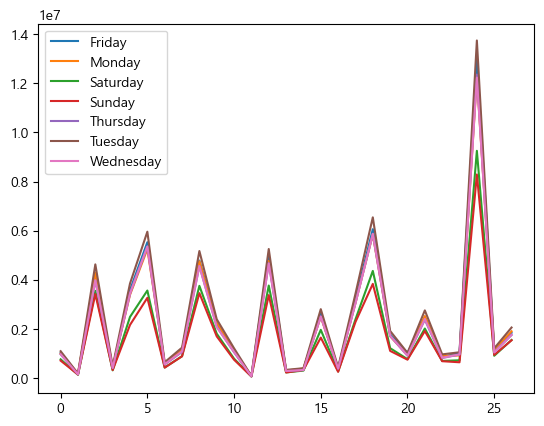

In [145]:
_lineByDoW.plot()

In [146]:
_lineByDoW.reset_index(drop=True, inplace=True)

In [147]:
_lineByDoW.head()

,line,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,일산선,1030223,1007750,769935,715312,974853,1100666,978743
1,장항선,166348,183524,140637,151078,162542,191200,157804
2,경부선,4221850,4296970,3558895,3423586,3975737,4632494,3989080
3,우이신설선,415283,437874,321994,331804,413185,484606,419434
4,분당선,3590760,3394069,2496628,2170127,3431590,3855469,3454879


#### 요일별 노선별로 데이터 Transpose

위 데이터는 행의 인덱스가 일련번호, line 2개가 있다. 이 경우 line을 삭제하고, 데이터를 90도 회전해서 그래프를 그려보자.

행의 인덱스가 여러개 있는 경우, ```df.set_index('line', inplace=True)``` 또는 ```df.reset_index(drop=True, inplace=True)```를 사용하서 제어할 수 있다.

reset_index(drop=True, inplace=True)는 기존 인덱스를 열로 추가하거나 삭제한다.
- drop=True: 기존 인덱스는 제거되고, 새로운 기본 정수 인덱스가 할당한다.
- inplace=True: 작업을 수행한 결과를 반환하지 않고, DataFrame 자체를 수정한다. 기본값은 False.

In [148]:
_lineByDoW.drop('line', axis=1).transpose()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
Friday,1030223,166348,4221850,415283,3590760,5535180,582652,1126904,4788871,2230772,...,3230522,6065666,1782141,1028935,2476500,858636,1034655,13052397,1133385,1845803
Monday,1007750,183524,4296970,437874,3394069,5251024,600380,1153238,4761541,2266697,...,3067310,5847289,1708729,945772,2532330,904591,927293,12232205,1163975,1910877
Saturday,769935,140637,3558895,321994,2496628,3568817,436345,897061,3759729,1813111,...,2395504,4366623,1222338,776671,2023514,703470,731294,9254124,914544,1557103
Sunday,715312,151078,3423586,331804,2170127,3272054,432531,892746,3463438,1704277,...,2289526,3838792,1112754,755720,1919945,693547,649966,8291390,950377,1544761
Thursday,974853,162542,3975737,413185,3431590,5338492,560880,1068616,4564427,2095747,...,3056291,5858577,1720810,918231,2378238,822954,964114,12357478,1056803,1757686
Tuesday,1100666,191200,4632494,484606,3855469,5962721,651442,1246793,5176950,2401864,...,3438675,6547565,1924512,1031159,2760681,971387,1057329,13743581,1217329,2063886
Wednesday,978743,157804,3989080,419434,3454879,5367079,571158,1092422,4566075,2083849,...,3047871,5879339,1731888,916891,2414049,834114,969863,12232002,1050130,1768748


- L1: ```.drop('line', axis=1)```은 'line' 열을 제거한다. (axis=1은 열, axis=0은 행)

아래 그래프를 보면 어느 역이나, 월 토 일에 승객이 많은 것을 알 수 있다.

In [149]:
new = _lineByDoW.drop('line', axis=1).transpose()

<Axes: >

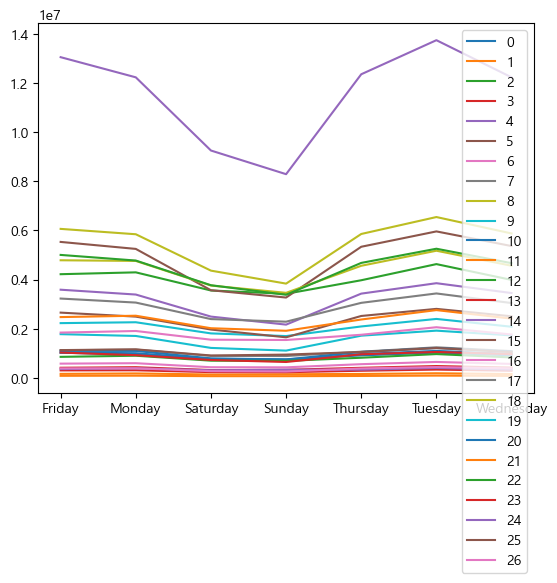

In [150]:
new.plot()

## 문제: 한국의 코로나바이러스

데이터는 https://www.kaggle.com/kimjihoo/coronavirusdataset를 방문하여 TimeProvince.csv를 다운로드해서 사용한다.
(열린데이터에서 제공하는 '서울시 코로나19 확진자 현황' (https://data.seoul.go.kr/dataList/OA-20279/S/1/datasetView.do))
문제를 풀고 결과 출력을 예시해 놓았다. 동일하지 않아도 유사하게 출력하면 된다.

* 1) DataFrame 생성하고, 자동인식한 스키마를 출력
* 2) 3월의 데이터만 출력

```python
+----------+----+--------+---------+--------+--------+
|      Date|time|province|confirmed|released|deceased|
+----------+----+--------+---------+--------+--------+
|2020-03-01|  16|   Seoul|       87|      11|       0|
|2020-03-01|  16|   Busan|       83|       0|       0|
|2020-03-01|  16|   Daegu|     2704|       6|      11|
+----------+----+--------+---------+--------+--------+
```

* 3) 년x월별 건수
```python
+----+---+---+---+---+---+---+
|year|  1|  2|  3|  4|  5|  6|
+----+---+---+---+---+---+---+
|2020|204|493|527|510|527|510|
+----+---+---+---+---+---+---+
```

* 4) 도x월별 건수
```python
+-----------------+---+---+---+---+---+---+
|         province|  1|  2|  3|  4|  5|  6|
+-----------------+---+---+---+---+---+---+
|           Sejong| 12| 29| 31| 30| 31| 30|
```

* 5) 도별 확진자 순위
```python
+----------+----+--------+---------+--------+--------+----+
|      Date|time|province|confirmed|released|deceased|rank|
+----------+----+--------+---------+--------+--------+----+
|2020-06-30|   0|  Sejong|       50|      47|       0|   1|
```

* 6) 도별 첫 확진자 출현 (모든 도 출력)
```python
+----------+----+-----------------+---------+--------+--------+
|      Date|time|         province|confirmed|released|deceased|
+----------+----+-----------------+---------+--------+--------+
|2020-02-22|  16|           Sejong|        1|       0|       0|
|2020-02-22|  16|            Ulsan|        1|       0|       0|
```

* 7) 도별 누적 확진자 (마지막 일 6월 30일 기준기준, 모든 도 출력)
```python
+----------+----+-----------------+---------+--------+--------+----+-----+--------------------+
|      Date|time|         province|confirmed|released|deceased|year|month|cumulative_confirmed|
+----------+----+-----------------+---------+--------+--------+----+-----+--------------------+
|2020-06-30|   0|           Sejong|       50|      47|       0|2020|    6|                5111|
|2020-06-30|   0|            Ulsan|       55|      50|       1|2020|    6|                5269|
```

* 8) 1-3 지난 7일 확진자 합계 (rolling)



### 1) DataFrame 생성

내려받은 데이터 파일의 내용을 살펴보자.
어떤 형식인지, 헤더가 있는지, 행과 열이 구조적인지에 따라 파일을 읽어오는 방식을 정한다.

In [184]:
import os
_covidProvinceDf = spark\
    .read\
    .options(header='true', inferschema='true', delimiter=',')\
    .csv(os.path.join('data', 'TimeProvince.csv'))

In [185]:
_covidProvinceDf.printSchema()

root
 |-- date: date (nullable = true)
 |-- time: integer (nullable = true)
 |-- province: string (nullable = true)
 |-- confirmed: integer (nullable = true)
 |-- released: integer (nullable = true)
 |-- deceased: integer (nullable = true)



### 2) 일자 형변환

In [186]:
from pyspark.sql.types import DateType

_covidProvinceDf = _covidProvinceDf.withColumn('Date', _covidProvinceDf['date'].cast(DateType()))

In [187]:
_covidProvinceDf.show(3)

+----------+----+--------+---------+--------+--------+
|      Date|time|province|confirmed|released|deceased|
+----------+----+--------+---------+--------+--------+
|2020-01-20|  16|   Seoul|        0|       0|       0|
|2020-01-20|  16|   Busan|        0|       0|       0|
|2020-01-20|  16|   Daegu|        0|       0|       0|
+----------+----+--------+---------+--------+--------+
only showing top 3 rows



### 2) 3월의 데이터만 출력

In [192]:
from pyspark.sql.types import DateType
import pyspark.sql.functions as F

#_covidProvinceDf.filter(_covidProvinceDf["Date"] == F.lit('2020-02-01')).show(3)
_covidProvinceDf.filter(_covidProvinceDf["Date"] == '2020-02-01').show(3)

+----------+----+--------+---------+--------+--------+
|      Date|time|province|confirmed|released|deceased|
+----------+----+--------+---------+--------+--------+
|2020-02-01|  16|   Seoul|        4|       0|       0|
|2020-02-01|  16|   Busan|        0|       0|       0|
|2020-02-01|  16|   Daegu|        0|       0|       0|
+----------+----+--------+---------+--------+--------+
only showing top 3 rows



- L4: ```.lit('2020-02-01')``` 함수는 상수 값(여기서는 '2020-02-01')으로 채워진 새로운 컬럼을 생성하고, 비교하게 된다.

3월만 선별해보자.

In [189]:
import pyspark.sql.functions as F
_covidProvinceDf.filter(F.month(_covidProvinceDf["Date"]) == '03').show(3)

+----------+----+--------+---------+--------+--------+
|      Date|time|province|confirmed|released|deceased|
+----------+----+--------+---------+--------+--------+
|2020-03-01|  16|   Seoul|       87|      11|       0|
|2020-03-01|  16|   Busan|       83|       0|       0|
|2020-03-01|  16|   Daegu|     2704|       6|      11|
+----------+----+--------+---------+--------+--------+
only showing top 3 rows



In [193]:
#_covidProvinceDf.filter(_covidProvinceDf["Date"] > F.lit('2020-02-01')).show(3)
_covidProvinceDf.filter(_covidProvinceDf["Date"] > '2020-02-01').show(3)

+----------+----+--------+---------+--------+--------+
|      Date|time|province|confirmed|released|deceased|
+----------+----+--------+---------+--------+--------+
|2020-02-02|  16|   Seoul|        5|       0|       0|
|2020-02-02|  16|   Busan|        0|       0|       0|
|2020-02-02|  16|   Daegu|        0|       0|       0|
+----------+----+--------+---------+--------+--------+
only showing top 3 rows



### 3) 년x월별 건수

In [194]:
import pyspark.sql.functions as F

_covidProvinceDf=_covidProvinceDf\
    .withColumn("year", F.year("Date"))\
    .withColumn("month", F.month("Date"))

In [195]:
_covidProvinceDf.groupBy("year").pivot("month").count().show()

+----+---+---+---+---+---+---+
|year|  1|  2|  3|  4|  5|  6|
+----+---+---+---+---+---+---+
|2020|204|493|527|510|527|510|
+----+---+---+---+---+---+---+



### 4) 도x월별 건수


In [196]:
_covidProvinceDf.groupBy("province").pivot("month").count().show()

+-----------------+---+---+---+---+---+---+
|         province|  1|  2|  3|  4|  5|  6|
+-----------------+---+---+---+---+---+---+
|           Sejong| 12| 29| 31| 30| 31| 30|
|            Ulsan| 12| 29| 31| 30| 31| 30|
|Chungcheongbuk-do| 12| 29| 31| 30| 31| 30|
|       Gangwon-do| 12| 29| 31| 30| 31| 30|
|          Gwangju| 12| 29| 31| 30| 31| 30|
| Gyeongsangbuk-do| 12| 29| 31| 30| 31| 30|
|            Daegu| 12| 29| 31| 30| 31| 30|
| Gyeongsangnam-do| 12| 29| 31| 30| 31| 30|
|          Incheon| 12| 29| 31| 30| 31| 30|
|          Jeju-do| 12| 29| 31| 30| 31| 30|
|      Gyeonggi-do| 12| 29| 31| 30| 31| 30|
|            Busan| 12| 29| 31| 30| 31| 30|
|          Daejeon| 12| 29| 31| 30| 31| 30|
|            Seoul| 12| 29| 31| 30| 31| 30|
|Chungcheongnam-do| 12| 29| 31| 30| 31| 30|
|     Jeollabuk-do| 12| 29| 31| 30| 31| 30|
|     Jeollanam-do| 12| 29| 31| 30| 31| 30|
+-----------------+---+---+---+---+---+---+



### 5) 도별 확진자 순위

In [197]:
from pyspark.sql.window import Window
from pyspark.sql import functions as F

confirmedByProvince = Window().partitionBy(['province']).orderBy(F.desc('confirmed'))
_covidProvinceDf.withColumn("rank", F.rank().over(confirmedByProvince)).show(3)

+----------+----+--------+---------+--------+--------+----+-----+----+
|      Date|time|province|confirmed|released|deceased|year|month|rank|
+----------+----+--------+---------+--------+--------+----+-----+----+
|2020-06-30|   0|   Busan|      154|     142|       3|2020|    6|   1|
|2020-06-29|   0|   Busan|      153|     143|       3|2020|    6|   2|
|2020-06-24|   0|   Busan|      152|     142|       3|2020|    6|   3|
+----------+----+--------+---------+--------+--------+----+-----+----+
only showing top 3 rows



### 6) 도별 첫 확진자 출현 (모든 도 출력)

도별로 확진자가 언제 처음 발생하는지 알아보려면:
* 1. confirmed 0을 제외
* 2. groupBy(province) 도별로 구분하고, 일자 정렬 (첫 확진자를 인식하도록)
* 3. province window의 row_number 1번만 출력

#### 확진자 0을 제외

In [198]:
#_covidProvinceDf.filter('confirmed' > 0).show()  # not working
_confirmedGt0=_covidProvinceDf.filter(F.col('confirmed') > 0)

In [199]:
_confirmedGt0.show()

+----------+----+-----------+---------+--------+--------+----+-----+
|      Date|time|   province|confirmed|released|deceased|year|month|
+----------+----+-----------+---------+--------+--------+----+-----+
|2020-01-20|  16|    Incheon|        1|       0|       0|2020|    1|
|2020-01-21|  16|    Incheon|        1|       0|       0|2020|    1|
|2020-01-22|  16|    Incheon|        1|       0|       0|2020|    1|
|2020-01-23|  16|    Incheon|        1|       0|       0|2020|    1|
|2020-01-24|  16|    Incheon|        1|       0|       0|2020|    1|
|2020-01-24|  16|Gyeonggi-do|        1|       0|       0|2020|    1|
|2020-01-25|  16|    Incheon|        1|       0|       0|2020|    1|
|2020-01-25|  16|Gyeonggi-do|        1|       0|       0|2020|    1|
|2020-01-26|  16|    Incheon|        1|       0|       0|2020|    1|
|2020-01-26|  16|Gyeonggi-do|        2|       0|       0|2020|    1|
|2020-01-27|  16|      Seoul|        1|       0|       0|2020|    1|
|2020-01-27|  16|    Incheon|     

#### 도별 일자별 정렬후 행번호 계산

In [201]:
from pyspark.sql.functions import row_number

dateByProvince = Window().partitionBy(['province']).orderBy('date')
_confirmedGt0ByProvince=_confirmedGt0.withColumn("row_number", row_number().over(dateByProvince))

In [202]:
_confirmedGt0ByProvince.where(F.col("row_number")==1).show()

+----------+----+-----------------+---------+--------+--------+----+-----+----------+
|      Date|time|         province|confirmed|released|deceased|year|month|row_number|
+----------+----+-----------------+---------+--------+--------+----+-----+----------+
|2020-02-20|  16|            Busan|        8|       0|       0|2020|    2|         1|
|2020-02-21|  16|Chungcheongbuk-do|        1|       0|       0|2020|    2|         1|
|2020-02-21|  16|Chungcheongnam-do|        1|       0|       0|2020|    2|         1|
|2020-02-18|  16|            Daegu|        1|       0|       0|2020|    2|         1|
|2020-02-22|  16|          Daejeon|        2|       0|       0|2020|    2|         1|
|2020-02-22|  16|       Gangwon-do|        6|       0|       0|2020|    2|         1|
|2020-02-04|  16|          Gwangju|        1|       0|       0|2020|    2|         1|
|2020-01-24|  16|      Gyeonggi-do|        1|       0|       0|2020|    1|         1|
|2020-02-19|  16| Gyeongsangbuk-do|        2|       1|

### 7) 주간단위의 평균

현재 시점으로 지난 7일간을 구간으로 설정하여 평균을 계산해보자.

In [203]:
from pyspark.sql.window import Window

dateByProvince = Window().partitionBy(['province']).orderBy('date').rowsBetween(-6,0)

timeprovinceWithRoll = _covidProvinceDf.withColumn("roll_7_confirmed",F.mean("confirmed").over(dateByProvince))

- L3: ```.rowsBetween(-6, 0)```은 현재 행부터 6개의 행 전까지의 범위를 윈도우 프레임으로 지정. 
예를 들어: 
    * 3월 17일은 3.11 ~ 3.17까지의 평균 10 + 15 + 32 + 38 + 39 + 40 + 40 = 214 / 7 = 30.57
    * 3월 18일은 3.12 ~ 3.18까지의 평균 15 + 32 + 38 + 39 + 40 + 40 + 41 = 245 / 7 = 35.0

In [207]:
timeprovinceWithRoll.filter(timeprovinceWithRoll.Date>'2020-03-10').show(3)
#timeprovinceWithRoll.filter(timeprovinceWithRoll.Date>F.lit('2020-03-10')).show(3)

+----------+----+--------+---------+--------+--------+----+-----+-----------------+
|      Date|time|province|confirmed|released|deceased|year|month| roll_7_confirmed|
+----------+----+--------+---------+--------+--------+----+-----+-----------------+
|2020-03-11|   0|   Busan|       98|      21|       0|2020|    3|95.57142857142857|
|2020-03-12|   0|   Busan|       99|      29|       0|2020|    3|96.57142857142857|
|2020-03-13|   0|   Busan|      100|      36|       0|2020|    3|97.28571428571429|
+----------+----+--------+---------+--------+--------+----+-----+-----------------+
only showing top 3 rows



### 8) 도별 누적 확진자 (마지막 일 6월 30일 기준, 모든 도 출력))

confirmed이 당일 확진된 인원이라면 너무 많아 보이지만, 그렇다고 간주하자.

In [210]:
from pyspark.sql.window import Window

# ok? winAgg = Window.partitionBy("province")
dateByProvince = Window().partitionBy(['province']).orderBy('date').rowsBetween(Window.unboundedPreceding,Window.currentRow)

timeprovinceWithRoll = _covidProvinceDf.withColumn("cumulative_confirmed",F.sum("confirmed").over(dateByProvince))

In [211]:
timeprovinceWithRoll.filter(timeprovinceWithRoll.Date=='2020-06-30').show(100)

+----------+----+-----------------+---------+--------+--------+----+-----+--------------------+
|      Date|time|         province|confirmed|released|deceased|year|month|cumulative_confirmed|
+----------+----+-----------------+---------+--------+--------+----+-----+--------------------+
|2020-06-30|   0|            Busan|      154|     142|       3|2020|    6|               16341|
|2020-06-30|   0|Chungcheongbuk-do|       65|      60|       0|2020|    6|                5801|
|2020-06-30|   0|Chungcheongnam-do|      167|     150|       0|2020|    6|               16780|
|2020-06-30|   0|            Daegu|     6906|    6700|     189|2020|    6|              807506|
|2020-06-30|   0|          Daejeon|      117|      44|       1|2020|    6|                5217|
|2020-06-30|   0|       Gangwon-do|       65|      54|       3|2020|    6|                5908|
|2020-06-30|   0|          Gwangju|       44|      32|       0|2020|    6|                3359|
|2020-06-30|   0|      Gyeonggi-do|     

## 문제: 서울시 지하철 호선별 역별 유/무임 승하차 인원

'서울시 지하철 호선별 역별 유/무임 승하차 인원 정보'를 csv파일로 내려받아서 분석해보자 (https://data.seoul.go.kr/dataList/OA-12251/S/1/datasetView.do?tab=S)

* (1-1) '서울시 지하철 호선별 역별 유_무임 승하차 인원 정보.csv'를 데이터프레임으로 읽고, 스키마를 출력
(도움말: 한글이 깨질 경우에는 엑셀에서 UTF로 저장하거나, 직접 csv파일을 수정한다).
* (1-2) 건수를 출력
* (1-3) '호선명'별 '유임승차인원'의 순위를 매기고, 그 결과를 30줄 출력 (마지막 'rank' 컬럼)
```
+------+------+--------+------------+------------+------------+------------+--------+----+
|사용월|호선명|지하철역|유임승차인원|무임승차인원|유임하차인원|무임하차인원|작업일자|rank|
+------+------+--------+------------+------------+------------+------------+--------+----+
|201605|일산선|    화정|      515925|      139163|      535460|      142410|20160608|   1|
|201512|일산선|    화정|      508044|      136734|      529106|      139931|20160108|   2|
|201603|일산선|    화정|      502144|      140596|      526030|      144088|20160408|   3|
```

* (1-4) '호선명'별 '유임승차인원'이 순위가 가장 높은 경우만 30건 출력 (마지막 'rank' 컬럼이 모두 1)
```
+------+--------------+--------------------+------------+------------+------------+------------+--------+----+
|사용월|        호선명|            지하철역|유임승차인원|무임승차인원|유임하차인원|무임하차인원|작업일자|rank|
+------+--------------+--------------------+------------+------------+------------+------------+--------+----+
|201605|        일산선|                화정|      515925|      139163|      535460|      142410|20160608|   1|
|201905|        장항선|                아산|      109243|       12901|       93737|       11808|20190603|   1|
|201512|        경부선|              영등포|     1439049|      280623|     1545631|      280969|20160108|   1|
```

* (1-5) '호선명'별 '유임승차인원'의 zscore. 윈도우 함수를 사용하여야 한다.



In [2]:
import os
os.environ["PYSPARK_PYTHON"]="/usr/bin/python3"
os.environ["PYSPARK_DRIVER_PYTHON"]="/usr/bin/python3"

In [3]:
import pyspark

myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

### (1-1) 데이터프레임으로 읽고, 스키마를 출력

내려받은 데이터 파일의 내용을 살펴보자.
어떤 형식인지, 헤더가 있는지, 행과 열이 구조적인지에 따라 파일을 읽어오는 방식을 정한다.

한글이 포함되어 있어서 문제가 될 수 있다.

In [213]:
_subwayFareDf = spark\
            .read.option("charset", "euc-kr")\
            .option("header", "true")\
            .option("inferschema", "true")\
            .option("delimiter",',')\
            .csv(os.path.join('data', '서울시 지하철 호선별 역별 유_무임 승하차 인원 정보.csv'))

In [214]:
_subwayFareDf.printSchema()

root
 |-- 사용월: integer (nullable = true)
 |-- 호선명: string (nullable = true)
 |-- 지하철역: string (nullable = true)
 |-- 유임승차인원: integer (nullable = true)
 |-- 무임승차인원: integer (nullable = true)
 |-- 유임하차인원: integer (nullable = true)
 |-- 무임하차인원: integer (nullable = true)
 |-- 작업일자: integer (nullable = true)



In [215]:
_subwayFareDf.show(5)

+------+------+--------+------------+------------+------------+------------+--------+
|사용월|호선명|지하철역|유임승차인원|무임승차인원|유임하차인원|무임하차인원|작업일자|
+------+------+--------+------------+------------+------------+------------+--------+
|202310| 1호선|  서울역|     1414759|      228199|     1325225|      221362|20231103|
|202310| 1호선|    시청|      680015|      110873|      688576|      109588|20231103|
|202310| 1호선|    종각|      934182|      153323|      912219|      142417|20231103|
|202310| 1호선| 종로3가|      505893|      318029|      450857|      290405|20231103|
|202310| 1호선| 종로5가|      496473|      268981|      499265|      260177|20231103|
+------+------+--------+------------+------------+------------+------------+--------+
only showing top 5 rows



### (1-2) 건수를 출력

In [216]:
_subwayFareDf.count()

63542

### (1-3) '호선명'별 '유임승차인원'의 순위를 매기고, 그 결과를 30줄 출력 (마지막 'rank' 컬럼)

In [217]:
from pyspark.sql.window import Window
from pyspark.sql import functions as F

byLine = Window().partitionBy(['호선명']).orderBy(F.desc('유임승차인원'))
#byLine = Window().partitionBy(['호선명'])

In [218]:
_subwayFareDf.withColumn("rank",F.rank().over(byLine)).show(30)

+------+------+--------+------------+------------+------------+------------+--------+----+
|사용월|호선명|지하철역|유임승차인원|무임승차인원|유임하차인원|무임하차인원|작업일자|rank|
+------+------+--------+------------+------------+------------+------------+--------+----+
|201501| 1호선|  서울역|     1890411|     1667163|      238403|      220008|20150206|   1|
|201503| 1호선|  서울역|     1880246|     1682965|      251663|      232039|20150408|   2|
|201512| 1호선|  서울역|     1795435|      235606|     1574932|      216587|20160108|   3|
|201611| 1호선|  서울역|     1764932|      233613|     1551558|      214816|20161208|   4|
|201605| 1호선|  서울역|     1748250|      234803|     1537480|      217300|20160608|   5|
|201505| 1호선|  서울역|     1729959|     1528601|      240726|      224543|20150608|   6|
|201511| 1호선|  서울역|     1728236|     1520608|      225080|      208173|20151204|   7|
|201603| 1호선|  서울역|     1726590|      233961|     1520626|      214752|20160408|   8|
|201610| 1호선|  서울역|     1723041|      232308|     1514424|      214146|201611

### (1-4) '호선명'별 '유임승차인원'이 순위가 가장 높은 경우만 30건 출력

마지막 'rank' 컬럼이 모두 1, 즉 순위가 가장 높은 경우만 선별한다.

In [219]:
_subwayFareDf.withColumn("rank",F.rank().over(byLine)).filter(F.col('rank')==1).show(100)

+------+--------------+--------------------+------------+------------+------------+------------+--------+----+
|사용월|        호선명|            지하철역|유임승차인원|무임승차인원|유임하차인원|무임하차인원|작업일자|rank|
+------+--------------+--------------------+------------+------------+------------+------------+--------+----+
|201501|         1호선|              서울역|     1890411|     1667163|      238403|      220008|20150206|   1|
|201501|         2호선|                강남|     3266271|     3353256|      164508|      149186|20150206|   1|
|201712|         3호선|          고속터미널|     1843154|      200178|     1760221|      189058|20180103|   1|
|201512|         4호선|                혜화|     1461258|      138010|     1521596|      138133|20160108|   1|
|201612|         5호선|광화문(세종문화회관)|     1328714|      109907|     1404285|      115604|20170108|   1|
|201710|         6호선|              이태원|      580419|       36941|      680830|       38853|20171103|   1|
|201512|         7호선|      가산디지털단지|     1245731|       82588|     1243464| 

### (1-5) '호선명'별 '유임승차인원'의 평균에서 자신을 차감

In [220]:
#byLineStn = Window().partitionBy(['호선명']).partitionBy(['지하철역']).orderBy(F.desc('유임승차인원'))
#byLineStn = Window().partitionBy(['호선명']).partitionBy(['지하철역'])
byLine = Window().partitionBy(['호선명'])

In [221]:
_subwayFareDf.withColumn("meanByLine",F.avg('유임승차인원').over(byLine))\
    .withColumn("distFromMean",F.col('meanByLine')-F.col('유임승차인원'))\
    .withColumn("stdByLine",F.stddev('유임승차인원').over(byLine))\
    .select('호선명','유임승차인원','meanByLine','distFromMean','stdByLine').show(10)

+------+------------+-----------------+------------------+------------------+
|호선명|유임승차인원|       meanByLine|      distFromMean|         stdByLine|
+------+------------+-----------------+------------------+------------------+
| 1호선|     1414759|547584.9390909091|-867174.0609090909|383611.64440137934|
| 1호선|      680015|547584.9390909091|-132430.0609090909|383611.64440137934|
| 1호선|      934182|547584.9390909091|-386597.0609090909|383611.64440137934|
| 1호선|      505893|547584.9390909091| 41691.93909090909|383611.64440137934|
| 1호선|      496473|547584.9390909091| 51111.93909090909|383611.64440137934|
| 1호선|      240537|547584.9390909091| 307047.9390909091|383611.64440137934|
| 1호선|      285710|547584.9390909091| 261874.9390909091|383611.64440137934|
| 1호선|      229494|547584.9390909091| 318090.9390909091|383611.64440137934|
| 1호선|      373168|547584.9390909091| 174416.9390909091|383611.64440137934|
| 1호선|      158633|547584.9390909091| 388951.9390909091|383611.64440137934|
+------+-------

## (1-5) '호선명'별 '유임승차인원'의 zscore를 계산하고 출력.

In [222]:
from pyspark.sql.window import Window

byLine = Window().partitionBy('호선명')

In [223]:
from pyspark.sql import functions as F

_subwayFareDf = _subwayFareDf.withColumn("meanByLine", F.avg(_subwayFareDf['유임승차인원']).over(byLine))
_subwayFareDf = _subwayFareDf.withColumn("sdByLine", F.stddev(_subwayFareDf['유임승차인원']).over(byLine))
_subwayFareDf = _subwayFareDf.withColumn("zscore", (F.col('유임승차인원')-F.col('meanByLine'))/F.col('sdByLine'))

In [224]:
_subwayFareDf.select('호선명', '유임승차인원', 'meanByLine', 'sdByLine', 'zscore').show(100)

+------+------------+-----------------+------------------+--------------------+
|호선명|유임승차인원|       meanByLine|          sdByLine|              zscore|
+------+------------+-----------------+------------------+--------------------+
| 1호선|     1414759|547584.9390909091|383611.64440137934|   2.260551976367412|
| 1호선|      680015|547584.9390909091|383611.64440137934| 0.34521908508733146|
| 1호선|      934182|547584.9390909091|383611.64440137934|  1.0077823928217045|
| 1호선|      505893|547584.9390909091|383611.64440137934|-0.10868267347819636|
| 1호선|      496473|547584.9390909091|383611.64440137934| -0.1332387580952308|
| 1호선|      240537|547584.9390909091|383611.64440137934| -0.8004135004036521|
| 1호선|      285710|547584.9390909091|383611.64440137934| -0.6826563867725165|
| 1호선|      229494|547584.9390909091|383611.64440137934| -0.8292004263512011|
| 1호선|      373168|547584.9390909091|383611.64440137934| -0.4546706066837056|
| 1호선|      158633|547584.9390909091|383611.64440137934| -1.0139210

## 문제 S-2:  Spark로 균등분포, 정규분포의 기본 통계 값을 계산.

### 문제

* 1-1 : 컬럼 4개의 DataFrame을 생성한다.
    * id: 일련번호
    * uniform: 균등분포 무작위 수
    * norm: 정규분포 무작위 수
    * zscore: 정규분포의 zscore

* 1-2: 기본통계 값을 계산해 보자.
* 1-3: 정규분포의 kurtosis, skewness를 계산
* zscore, outlier????

### 해결

* id컬럼은 range() 함수에서 일련의 수를 생성한다.
* 균등분포 무작위 수는 rand(), 정규분포는 randn() 함수를 사용하여 추출한다.
* zscore는 계산식을 이용한다.

### DataFrame 생성

createDataFrame() 함수는 RDD, 리스트, pandas DataFrame 또는 파일에서 생성할 수 있다.
DataFrame을 만들려면, 리스트 또는 

1. python으로 uniform 리스트 생성
2. createDataFrame
3. spark로 정규분포 생성


#### id 컬럼 생성

첫 컬럼은 'id', SparkSession.range()를 사용한다.

In [1]:
import os
os.environ["PYSPARK_PYTHON"]="/usr/bin/python3"
os.environ["PYSPARK_DRIVER_PYTHON"]="/usr/bin/python3"

import pyspark

myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

In [88]:
_df = spark.range(0, 30)

In [89]:
_df.show(5)

+---+
| id|
+---+
|  0|
|  1|
|  2|
|  3|
|  4|
+---+
only showing top 5 rows



#### 균등, 정규분포 컬럼 생성

**```pyspark.sql.functions```**를 사용하여 무작위 수의 컬럼을 생성해 보자.
* rand(): 0,1 사이의 균등분포를 생성한다. seed를 넣어서 생성할 수 있다.
* randn(): 정규분포를 생성한다. seed를 넣어서 생성할 수 있다.

In [91]:
from pyspark.sql.functions import rand, randn

colUniform = rand(seed=10).alias("uniform")
colNormal = randn(seed=27).alias("normal")

#### 묶어서 데이터프레임 생성

In [92]:
_df = _df.select("id", colUniform, colNormal)

### zscore

In [ ]:
from pyspark.sql.window import Window
import sys

byAll = Window.rowsBetween(-sys.maxsize, sys.maxsize)

In [ ]:
from pyspark.sql import functions as F

_df = _df.withColumn("meanN", F.avg(_df['normal']).over(byAll))
_df = _df.withColumn("stddevN", F.stddev(_df['normal']).over(byAll))
_df = _df.withColumn("zscoreN", (F.col('normal')-F.col('meanN'))/F.col('stddevN'))

왜 zscoreN과 normal??? 차이가 나지
정규분포의 평균, 표준편차가 정확하게 0, 1이 아니다.
계산을 해보면 정규분포 평균은 -0.053, 표준편차는 1.064
반면에 zscore의 평균은 1.850, 표준편차는 1.0

In [94]:
_df.show(3)

+---+------------------+-------------------+-------------------+------------------+-------------------+
| id|           uniform|             normal|              meanN|           stddevN|            zscoreN|
+---+------------------+-------------------+-------------------+------------------+-------------------+
|  0|0.1709497137955568|-0.8664700627108758|-0.0526632301286973|1.0637064308067905|-0.7650671360188446|
|  1|0.8051143958005459|-0.5970491018333267|-0.0526632301286973|1.0637064308067905|-0.5117820631127786|
|  2|0.5775925576589018|0.18267161219540898|-0.0526632301286973|1.0637064308067905| 0.2212404057251131|
+---+------------------+-------------------+-------------------+------------------+-------------------+
only showing top 3 rows



모든 행을 완전하게 출력하려면, 모든 행을 의미하는 df.count() 함수와 truncate=False로 입력하여 출력 show() 한다.

In [96]:
_df.show(_df.count(), False)

+---+--------------------+--------------------+-------------------+------------------+--------------------+
|id |uniform             |normal              |meanN              |stddevN           |zscoreN             |
+---+--------------------+--------------------+-------------------+------------------+--------------------+
|0  |0.1709497137955568  |-0.8664700627108758 |-0.0526632301286973|1.0637064308067905|-0.7650671360188446 |
|1  |0.8051143958005459  |-0.5970491018333267 |-0.0526632301286973|1.0637064308067905|-0.5117820631127786 |
|2  |0.5775925576589018  |0.18267161219540898 |-0.0526632301286973|1.0637064308067905|0.2212404057251131  |
|3  |0.9476047869880925  |-1.8497305679917546 |-0.0526632301286973|1.0637064308067905|-1.689439196583623  |
|4  |0.2093704977577     |0.9410417279045351  |-0.0526632301286973|1.0637064308067905|0.9341909847057482  |
|5  |0.36664222617947817 |-0.6516475674670159 |-0.0526632301286973|1.0637064308067905|-0.5631105726079011 |
|6  |0.8078688178371882  |0.

### 기본 통계

주사위는 이산균등분포의 가장 대표적인 예이다. 각 숫자가 나올 확률은 1/6이다.
정규분포는 평균 0을 중심으로 빈도가 몰려있어 표준편차만큼 퍼진 특징을 가진다.
각 컬럼별로 통계 값을 계산할 수 있다.

In [98]:
_df.drop("meanN").drop("stddevN").describe().show()

+-------+-----------------+--------------------+-------------------+--------------------+
|summary|               id|             uniform|             normal|             zscoreN|
+-------+-----------------+--------------------+-------------------+--------------------+
|  count|               30|                  30|                 30|                  30|
|   mean|             14.5|  0.5003518248858122|-0.0526632301286973|1.850371707708594...|
| stddev|8.803408430829505|  0.2879269232019638| 1.0637064308067905|                 1.0|
|    min|                0|0.014097110603182639| -2.152050408741013|  -1.973652802888473|
|    max|               29|  0.9701253460019921|  1.669616371300714|   1.619130571696471|
+-------+-----------------+--------------------+-------------------+--------------------+



## S.10 추론

지금까지 평균, 표준편차, zscore, cdf와 같은 통계량을 계산하고, 그 의미를 설명하였다.
통계추론은 이러한 통계량을 통해 1) 모집단의 특성을 추측하거나, 2) 가설을 검증하는 것을 말한다.

### S.10.1 Kolmogorov-Smirnov 검정

콜모고로프-스미르노프 KS는 데이터가 두 표본의 확률분포가 서로 다른지 검정하는 **비모수 추정**이다.

비모수 추정이란 모수로 어떤 확률분포, 보통은 **정규분포를 따른다는 전제로 통계적 추정을 하지 않는다**는 의미이다. 그런 의미에서 비모수 추정 혹은 분포무관 추정이라고 한다.

x1, x2, ..., xn 데이터가 있다고 하고, 이 데이터가 어떤 분포에서 추출되었는지 추정한다.
* 귀무 가설 H0: 두 표본이 같은 분포에서 추출되었다 (표본 간 차이가 없다)
* 대안 가설 H1: 두 표본이 다른 분포에서 추출되었다.

In [79]:
import os
os.environ["PYSPARK_PYTHON"]="/usr/bin/python3"
os.environ["PYSPARK_DRIVER_PYTHON"]="/usr/bin/python3"

In [80]:
import pyspark

myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

먼저 표본 데이터에서 RDD를 생성하자.

In [25]:
xRdd = spark.sparkContext.parallelize([1.0, 2.0, 5.0, 4.0, 3.0, 3.3, 5.5])

kolmogorovSmirnovTest의 통계량을 통해 데이터가 정규분포와 차이가 있는지 비교한다.

귀무가설 H0은 정규분포를 따른다고 설정되어 있고, p-value가 적으면 (일반적으로 p < 0.050 또는 0.01)이를 기각하게 된다.

In [28]:
from pyspark.mllib.stat import Statistics

testResult = Statistics.kolmogorovSmirnovTest(xRdd, "norm")

print(testResult)

Kolmogorov-Smirnov test summary:
degrees of freedom = 0 
statistic = 0.841344746068543 
pValue = 5.06089025353873E-6 
Very strong presumption against null hypothesis: Sample follows theoretical distribution.


- L1: mllib 모듈을 사용한다는 것에 유의한다.
- L3: 검증하려는 분포의 명칭, 현재는 정규분포 "norm"만을 지원한다.
- L5: 통계량을 출력

출력을 보면:

- pValue = 5.06089025353873E-6는 0.00000506이고,
- "Very strong presumption against null hypothesis" 귀무가설을 기각한다는 메시지가 출력되고 있다.

즉 통계적으로 표본은 정규분포를 따르지 않는다고 추정할 수 있다. 즉 데이터는 정규분포가 아니다라고 추정한다.

### scipy Kolmogorov-Smirnov

SciPy는 Python numpy 기반으로 통계, 최적화, 신호처리, 선형대수 연산, 미적분, fft 등 수치 및 과학 계산 관련 많이 쓰이는 라이브러리이다. 

방금 사용했던 spark의 KS 검증을 이번에는 scipy 라이브러리로 적용해보자.

In [1]:
from scipy.stats import kstest

kstest([1.0, 2.0, 5.0, 4.0, 3.0, 3.3, 5.5], 'norm')

KstestResult(statistic=0.8413447460685429, pvalue=5.060890253444183e-06)

앞서와 동일한 방식으로 pValue가 유의 수준 보다 낮으면 (p < 0.050), 귀무가설을 기각한다 (귀무가설은 집단 간 차이가 없다로 설정한다).

즉, 두 집단의 평균에 차이가 없다.

p<0.005이므로 귀무가설을 기각, 즉 두 집단간에 차이가 있다.

In [2]:
kstest([1.0, 2.0, 5.0, 4.0, 3.0, 3.3, 5.5], [11.0, 12.0, 15.0, 14.0, 13.0, 13.3, 15.5])

KstestResult(statistic=1.0, pvalue=0.0005827505827505828)

두 집단의 측정값에 0.1씩 차이를 두어 보자
p값이 유의수준보다 매우 크게 계산된다.
이는 두 집단의 평균에는 차이가 없다는 의미이다.

In [3]:
kstest([1.0, 2.0, 5.0, 4.0, 3.0, 3.3, 5.5], [1.1, 2.1, 5.1, 4.1, 3.1, 3.4, 5.6])

KstestResult(statistic=0.14285714285714285, pvalue=0.9999609537692629)

In [37]:
from scipy.stats import ks_2samp

ks_2samp([1.0, 2.0, 5.0, 4.0, 3.0, 3.3, 5.5], [1.1, 2.1, 5.1, 4.1, 3.1, 3.4, 5.6])

KstestResult(statistic=0.14285714285714285, pvalue=0.9999609537692629)

리스트를 사용해서 오류가 발생한다면 numpy array로 넘겨주어보자.

In [4]:
import numpy as np
kstest(np.array([1.0, 2.0, 5.0, 4.0, 3.0, 3.3, 5.5]), np.array([1.1, 2.1, 5.1, 4.1, 3.1, 3.4, 5.6]))

KstestResult(statistic=0.14285714285714285, pvalue=0.9999609537692629)

### S.10.2 ANOVA

ANOVA one-way analysis of variance는 2개 이상의 독립된 그룹 간의 평균에 통계적으로 유의미한 차이가 있는지 판단하는 기법이다.
ANOVA는 SPSS, SAS, R 등에서는 지원되고 있지만, Spark에는 ANOVA 모듈이 없다. Python에서는 statsmodel을 사용하면 된다.

#### 데이터

statsmodels에서 Moore 데이터를 가져오자.
Moore는 파트너의 신분이 높거나, 낮은 경우 그 결정에 얼마나 따르는지 보는 사회심리실험 데이터이다.
* partner.status 파트너의 신분 high, low
* conformity conforming하는 회수 (전체 40회)
* fcategory: F-Scale 구분 high, low, medium.
* fscore: Authoritarianism 권위주의 점수

```pip install statsmodels```로 설치를 한다.

In [152]:
import statsmodels.api as sm

moore=sm.datasets.get_rdataset("Moore","carData")

In [153]:
moore.data.head()

,partner.status,conformity,fcategory,fscore
0,low,8,low,37
1,low,4,high,57
2,low,8,high,65
3,low,7,low,20
4,low,10,low,36


컬럼명에 점이 포함되어서 문제가 될 수 있으므로, 제거해서 재명명해준다.

In [154]:
moore.data.columns=['status','conformity', 'fcategory', 'fscore']
moore.data.columns

Index(['status', 'conformity', 'fcategory', 'fscore'], dtype='object')

#### R 스타일 모델링

**R 스타일**에 따라 종속변수 fscore, 독립변수 status, fcategory로 모델링한다.
이때 **명목변수는 C() 연산자**를 사용한다.

In [155]:
from statsmodels.formula.api import ols

formula='fscore~C(status)*C(fcategory)'
model=ols(formula, data=moore.data).fit()

#### ANOVA 적용

선형모델 ANOVA를 적용해 보자.

ANOVA는 2개 이상의 그룹의 평균에 차이가 있는지 비교할 때 사용한다.
독립변수의 수가 1개 이면 one-way, 2개 이면 two-way ANOVA라고 한다.

- 귀무가설은 그룹의 평균에는 서로 차이가 없다.
= 대체가설은 그룹의 평균에는 서로 차이가 있다.

아래에서 fcategory의 PR이 0.05보다 적다. 즉 **fcategory high, low, medium의 그룹 간 유의미하게 평균의 차이**가 있다는 의미이다.
그외 status 변인, 그리고 상호작용 status x fcategory는 유의하지 않다.

아래 표에서 과학적 표기를 이해해 보자. E+01은 소수점을 오른쪽으로 1칸 이동, E+00는 현재 그대로, E–01은 왼쪽으로 1칸 이동해서 읽으면 된다.
6.330623e-01은 0.6330623을 의미한다.

In [156]:
from statsmodels.stats.anova import anova_lm

result = anova_lm(model)

In [157]:
result

,df,sum_sq,mean_sq,F,PR(>F)
C(status),1.0,7.932587,7.932587,0.231555,6.330623e-01
C(fcategory),2.0,7561.365635,3780.682818,110.359336,8.768957e-17
C(status):C(fcategory),2.0,29.086807,14.543403,0.424527,6.570656e-01
Residual,39.0,1336.059416,34.257934,NaN,NaN


#### 평균

statsmodels에서 읽은 데이터는 moore.data하면 pandas의 DataFrame이다. 따라서 groupby() 명령어로 평균을 쉽게 구할 수 있다.

In [158]:
moorePd = moore.data

fcategory를 그룹별로 모든 변수의 평균을 계산해 보자.

In [159]:
moorePd.groupby('fcategory').mean()

C:\Users\jsl\AppData\Local\Temp\ipykernel_33564\4256169206.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  moorePd.groupby('fcategory').mean()


,conformity,fscore
fcategory,,
high,12.266667,58.533333
low,11.733333,26.933333
medium,12.400000,43.866667


fcategory를 그룹별로 fscore 변수의 평균만을 선택하여 계산해 보자.

In [160]:
moorePd.groupby('fcategory')['fscore'].mean()

fcategory
high      58.533333
low       26.933333
medium    43.866667
Name: fscore, dtype: float64

#### 그래프

<Axes: >

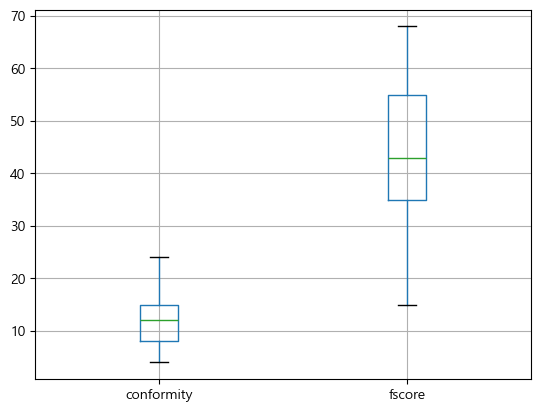

In [161]:
moorePd.boxplot()

#### fcategory별 fscore 그래프

먼저 fcategory별 fscore를 계산해서 그래프를 그려야 한다.

In [162]:
_fscore = moorePd.groupby('fcategory')['fscore'].mean()

<Axes: title={'center': 'fscore by fcategory'}, xlabel='fcategory'>

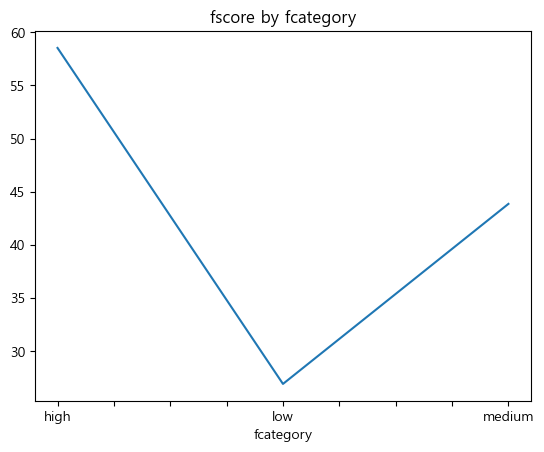

In [163]:
_fscore.plot(x="fcategory", y=_fscore,  title="fscore by fcategory")

## S.11 빈도 분석

**명목변수 Categorical or nominal varaible**는 이름이 붙여진 변수로서 문자로 표현되는 변수를 말한다.
명목변수별로 빈도를 계산하고 차이가 있는지 보게 된다.

In [164]:
names = ["kim","lee","park","lim"]
items = ["espresso","latte","americano","affocato","long black","macciato"]

names에서 하나씩, items에서도 하나씩 추출해서 5개만 만들어보자.

In [165]:
[(names[i%4], items[i%6]) for i in range(5)]

[('kim', 'espresso'),
 ('lee', 'latte'),
 ('park', 'americano'),
 ('lim', 'affocato'),
 ('kim', 'long black')]

이번에는 500개를 만들어보자.

In [168]:
coffeeDf = spark.createDataFrame([(names[i%4], items[i%6]) for i in range(500)],\
                           ["name","coffee"])

명목변수에 대해서는 평균, 표준편차와 같은 통계량을 계산하는 것은 의미가 없다.

In [169]:
coffeeDf.describe().show()

+-------+----+--------+
|summary|name|  coffee|
+-------+----+--------+
|  count| 500|     500|
|   mean|null|    null|
| stddev|null|    null|
|    min| kim|affocato|
|    max|park|macciato|
+-------+----+--------+



또는 문자열에 대해서 통계량을 구해보자.
개수, 키개수 unique, 첫째 값 top, 최빈키의 빈도 freq를 출력하고 있다.

In [170]:
coffeeDf.toPandas().describe()

,name,coffee
count,500,500
unique,4,6
top,kim,espresso
freq,125,84


### S.11.1 crosstab

앞서 생성했던 데이터를 사용해서, 교차표를 만들어 보자.

pivot으로 건수를 계산하면 아래와 같다.

In [171]:
coffeeDf.groupBy('name').pivot('coffee').count().show()

+----+--------+---------+--------+-----+----------+--------+
|name|affocato|americano|espresso|latte|long black|macciato|
+----+--------+---------+--------+-----+----------+--------+
|park|    null|       42|      42| null|        41|    null|
| lim|      42|     null|    null|   42|      null|      41|
| kim|    null|       41|      42| null|        42|    null|
| lee|      41|     null|    null|   42|      null|      42|
+----+--------+---------+--------+-----+----------+--------+



crosstab 교차표를 만들면 pivot과 유사한 결과를 얻을 수 있다.

In [172]:
coffeeDf.stat.crosstab("name", "coffee").show()

+-----------+--------+---------+--------+-----+----------+--------+
|name_coffee|affocato|americano|espresso|latte|long black|macciato|
+-----------+--------+---------+--------+-----+----------+--------+
|       park|       0|       42|      42|    0|        41|       0|
|        lim|      42|        0|       0|   42|         0|      41|
|        kim|       0|       41|      42|    0|        42|       0|
|        lee|      41|        0|       0|   42|         0|      42|
+-----------+--------+---------+--------+-----+----------+--------+



### S.11.2 freqItems()

데이터에 대해 50%이상 발생한 행을 출력해 보자.
임계치 이하의 최빈값을 구할 수 있다.

In [173]:
freq = coffeeDf.stat.freqItems(["name","coffee"], 0.5)
freq.show()

+--------------+-----------------+
|name_freqItems| coffee_freqItems|
+--------------+-----------------+
|   [park, lim]|[latte, espresso]|
+--------------+-----------------+



### S.11.3 Chi Square

Chi-Square 테스트는 label와 features 서로 상관관계가 있는지 검증하는 비모수 추정방법이다.
feature의 발생이 label과 어떤 관련이 있는지 추정하는 것이다.
단 label, features 모두 명목변수이어야 한다.
* 귀무 가설은 label과 features 간에 서로 독립적이다.

#### 데이터

앞서 coffeeDf를 사용하자.

In [6]:
coffeeDf.printSchema()

root
 |-- name: string (nullable = true)
 |-- coffee: string (nullable = true)



#### label을 수로 변환

label, features 모두 명목변수이지만, 문자가 아니라 수와 벡터로 각 각 변환되어야 한다.

In [174]:
from pyspark.ml.feature import StringIndexer

labelIndexer = StringIndexer(inputCol="name", outputCol="label")
model=labelIndexer.fit(coffeeDf)
_coffeeDf=model.transform(coffeeDf)

In [175]:
_coffeeDf.printSchema()

root
 |-- name: string (nullable = true)
 |-- coffee: string (nullable = true)
 |-- label: double (nullable = false)



In [176]:
_coffeeDf.show(4)

+----+---------+-----+
|name|   coffee|label|
+----+---------+-----+
| kim| espresso|  0.0|
| lee|    latte|  1.0|
|park|americano|  3.0|
| lim| affocato|  2.0|
+----+---------+-----+
only showing top 4 rows



#### features를 벡터로 변환

우선 명목 문자열을 수로 변환한다.

In [177]:
featureIndexer = StringIndexer(inputCol="coffee", outputCol="_features")
model=featureIndexer.fit(_coffeeDf)
_coffeeDf=model.transform(_coffeeDf)

다음은 수를 벡터로 변환한다.
inputCols에는 리스트를 적어준다.
즉 "_features" (x) -> [ "_features" ] (o)이라고 한다.

In [178]:
#from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

va = VectorAssembler(inputCols=["_features"], outputCol="features")
_coffeeDf = va.transform(_coffeeDf)

In [179]:
_coffeeDf.printSchema()
_coffeeDf.show(5)

root
 |-- name: string (nullable = true)
 |-- coffee: string (nullable = true)
 |-- label: double (nullable = false)
 |-- _features: double (nullable = false)
 |-- features: vector (nullable = true)

+----+----------+-----+---------+--------+
|name|    coffee|label|_features|features|
+----+----------+-----+---------+--------+
| kim|  espresso|  0.0|      0.0|   [0.0]|
| lee|     latte|  1.0|      1.0|   [1.0]|
|park| americano|  3.0|      3.0|   [3.0]|
| lim|  affocato|  2.0|      2.0|   [2.0]|
| kim|long black|  0.0|      4.0|   [4.0]|
+----+----------+-----+---------+--------+
only showing top 5 rows



#### ChiSquareTest

ChiSquareTest에는 다음 인자를 적어준다.
* 데이터: 명목 label, 명목 features로 구성된 DataFrame.
* featuresCol: features 컬럼명을 적어준다. Vector 타입이어야 한다.
* labelCol: label 컬럼명을 적어준다. 숫자인 타입이면 된다.

In [180]:
from pyspark.ml.stat import ChiSquareTest
r = ChiSquareTest.test(_coffeeDf, "features", "label")

In [181]:
r.show()

+-------+----------------+-------------------+
|pValues|degreesOfFreedom|         statistics|
+-------+----------------+-------------------+
|  [0.0]|            [15]|[500.0963855421687]|
+-------+----------------+-------------------+



위 컬럼을 하나씩 출력해보자.
pValues=0.0이므로 귀무가설을 기각한다. 서로 유의적인 상관관계가 있다.

In [182]:
from pyspark.ml.stat import ChiSquareTest
r = r.head()

In [183]:
print("pValues: " + str(r.pValues))
print("degreesOfFreedom: " + str(r.degreesOfFreedom))
print("statistics: " + str(r.statistics))

pValues: [0.0]
degreesOfFreedom: [15]
statistics: [500.0963855421687]


## S.12 상관관계

상관관계는 변수 간에 서로 어떤 관계가 있는지, 그 변화의 **방향**, **강도**를 나타낸다.

연속 변수들이 서로 커지거나 작아지거나 하는 의미를 관계를 표현한다.

**명목변수**와의 상관관계를 계산하는 것은 의미가 있지 않고, 앞서 배웠던 빈도분석을 하는 것이 좋겠다.

단, 서로 상관관계가 있다고 해서 인과관계가 있다는 의미는 아니다.

키와 몸무게가 서로 상관관계가 있다고 하자.
키가 원인이 되어서 몸무게가 결과로 올라간다고 가정해서는 안된다는 것이다.
담배와 암의 상관관계의 상관관계 높다. 그리고 담배가 암을 유발하는 관계이지만, 
이러한 방향을 말해주는 것은 아니다.

**맥주**와 **선풍기**의 매출은 서로 상관관계가 있다.
그렇다고 해서 선풍기의 매출이 원인이 되어 맥주의 매출을 올린 것은 아니다.
더워져서 선풍기와 맥주의 매출이 올라간 것으로 이해해야 한다.
또 **교통상황**과 **약속지체**는 상관관계가 있다.
교통이 막히면 약속이 늦어지는 것은 맞다.
그렇다고 해서 약속이 늦어진다고 교통이 막히는 것은 아니다.


### S.12.1 상관관계 방향과 강도

* $+$ 변수가 서로 같은 방향으로 변동, 숫자가 클수록 강도가 크며 반대로 적을수록 적다.
* 0 변수가 서로 영향을 주지 않음
* $-$ 변수가 서로 다른 방향으로 변동

상관관계는 공분산 covariance를 표준편차의 곱으로 나눈 값으로 계산한다.

$$
r_{(x,y)} = \frac {cov(x,y)} {s_x s_y}
$$

$$
cov(x,y)=\frac{ \sum\limits_{i=1}^n (x_i - \bar{x}) (y_i - \bar{y} ) }
                       {n-1}
$$

바로 계산하면 n-1이 표준편차 계산하면서 상쇄되므로 아래와 같다:

$$
   r = \frac{\sum\limits_{i=1}^n (X_i - \bar{X})(Y_i -
   \bar{Y})}{\sqrt{\sum\limits_{i=1}^n (X_i - \bar{X})^2} \sqrt{\sum
   \limits_{i=1}^n (Y_i - \bar{Y})^2}}
$$

### S.12.2 그래프

#### 데이터 생성

변수들이 서로 어떤 관계를 가지고 있는지 그래프를 그려보면 쉽게 파악할 수 있다.
우선 임의로 X, Y 데이터를 생성하고, 그래프에서 서로 어떻게 변화하는지 알아보자.

In [28]:
X=[10,7,12,12,9,16,12,18,8,12,14,16]
Y=[6,4,7,8,10,7,10,15,5,6,11,13]

#### 단순 Plot

```matplotlib``` 라이브러리를 사용하여 X, Y 그래프를 그려보자.
```%mathplotlib inline```는 노트북에서 그래프를 바로 아래 출력창에 띄운다.
이 명령어가 없으면 별도의 창을 열어서 띄우게 된다.
* ```plot()```은 X, Y 데이터를 입력하고, ```go```는 green색으로 빈동그라미 ```o```로 표시하게 된다.
* ```title()```은 제목을 적는 함수이고, 유니코드 지원이 되지 않아서 제목에 한글을 쓸 수는 없다. 
* ```ylabel()```은 y축 명을 적는 기능이다.

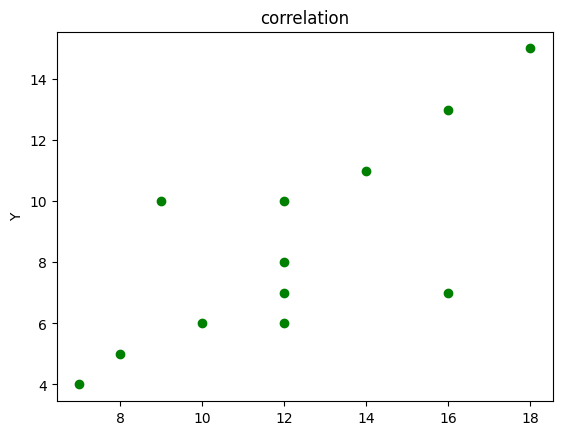

In [29]:
%matplotlib inline

from matplotlib import pyplot as plt

plt.title('correlation')
plt.plot(X, Y, 'go')
plt.ylabel('Y')

plt.show()


#### Scatter

X, Y 변수의 상관관계를 산포해보자.

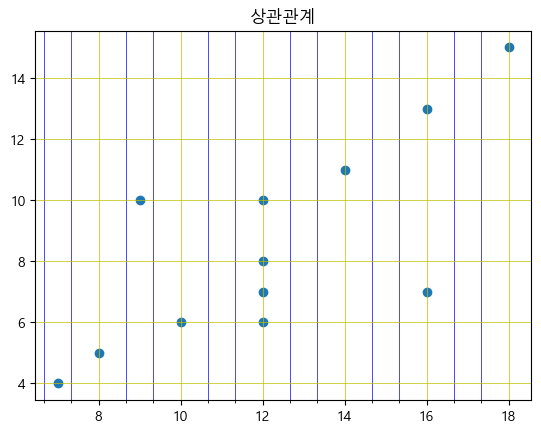

In [34]:
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
plt.rcParams["font.family"] = "Malgun Gothic"
#plt.rc('font', family='NanumMyeongjo')
ax.title.set_text('상관관계')
ax.scatter(X, Y)
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator(1))
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator(3))
#ax.grid(b=True, which='major', color='y', linewidth=0.5)
ax.grid(which='major', color='y', linewidth=0.5)
#ax.grid(b=True, which='minor', color='b', linewidth=0.5)
ax.grid(which='minor', color='b', linewidth=0.5)
#fig.show()

* L4: ```subplots()``` 명령어의 인자로 넣는 수는 행, 열로 그래프의 바둑판 위치를 의미한다.
예를 들어, 인자 ```1,1```은 1행, 1열을 ```1,2```는 1행, 2열을 의미한다.
이 명령어는 Figure와 Axes를 반환해서, 그림의 설정을 변경할 수 있다.

- L8 ~ 9: 축의 보조 눈금을 설정한다.
    - ax: 축(axis)을 나타내는 객체
    - get_xaxis(): 축(axis)에서 x 축에 대한 속성과 설정을 가져오는 함수
    - set_minor_locator() 보조 눈금의 위치를 설정. ```set_minor_locator()```는 '사이 구분자'를 설정할 수 있고, AutoMinorLocator(3)은 구분자 2개를 ```AutoMinorLocator(5)```는 큰 구분자들 사이 구분자 4개를 넣으라는 의미이다.
    - mpl.ticker.AutoMinorLocator(3): AutoMinorLocator 클래스를 사용하여 보조 눈금을 자동으로 설정, 숫자 3은 보조 눈금의 간격 

- L10 ~ 11: grid() 명령어는 격자선을 설정한다. b=True는 표시하라는 의미, which는 한다.
    - b=True: 그리드 선을 표시할지 말지, True는 그리드가 활성화한다.
    - which='major': 어떤 눈금에 대한 그리드를 설정할지 지정, 'major' (주 눈금), 'minor', 'both' 가운데 하나를 설정
    - color='y': 그리드의 색상을 지정하는데, 'y'는 노란색의 약자
    - linewidth=0.5: 그리드 눈금의 두께를 지정한다.

### S.12.3 데이터

임의로 X, Y 데이터를 생성해보자

In [35]:
X=[2.1,2.5,4.0,3.6]
Y=[8,12,14,10]

X=[10,7,12,12,9,16,12,18,8,12,14,16]
Y=[6,4,7,8,10,7,10,15,5,6,11,13]

### S.12.4 numpy 공분산 계산

#### 공분산 계산식

라이브러리를 사용하지 않고, 공분산을 계산해보자.
공분산의 부호는 두 변수가 같은 방향, 다른 방향으로 움직이는지 보여준다.
공분산이 '0'이라면 두 변수가 독립적이란 의미이다.
크기는 해석하기 어렵다.

In [36]:
import numpy as np
xbar=np.mean(X)
ybar=np.mean(Y)

In [37]:
covxy=sum( [ (x-xbar)*(y-ybar) for x,y in zip(X,Y) ]) / (len(X)-1)
print ("simple cov=", covxy)

simple cov= 8.454545454545455


#### numpy 공분산

numpy로 공분산을 계산해보자. 앞에서의 계산과 동일한 결과를 출력한다.
numpy 공분산은 계산하면 x,y 컬럼에 대한 2 x 2 값을 출력한다.
공분산값은 x와 y 컬럼이 교차하는 값이다.

In [38]:
print ("np cov=\n",np.cov(X,Y))

np cov=
 [[11.42424242  8.45454545]
 [ 8.45454545 11.18181818]]


서로 x와 x컬럼이 만나는 값은, 자신에 대한 공분산을 계산한 값으로 ```sum( (x-mean(x))**2) / (n-1)```,
x대신 y를 대입하면 나머지 값이 계산된다.
계산해보자.

In [39]:
print (np.sum( (X-np.mean(X))**2) / (len(X)-1))
print (np.sum( (Y-np.mean(Y))**2) / (len(Y)-1))

11.424242424242424
11.181818181818182


위 값을 관찰하면, variance 값과 계산식이 동일하다.

In [40]:
print(np.var(X, ddof=1))

11.424242424242424


자신에 대한 공분산을 계산하면 동일한 값을 출력한다.

In [24]:
print ("npcov of X", np.cov(X)) #sum( [ (x-xbar)**2 for x in X ])/(len(X)-1)
print ("npcov of Y", np.cov(Y))

npcov of X 11.424242424242426
npcov of Y 11.181818181818182


### S.12.5 상관관계

상관관계는 공분산을 표준편차의 곱으로 나누어서 계산한다.

#### numpy 계산
앞서 계산했던 식을 기억하고, 그 값을 가져온다.

In [25]:
import numpy as np

xbar=np.mean(X)
ybar=np.mean(Y)
sx=np.sqrt(np.var(X,ddof=1))
sy=np.sqrt(np.var(Y,ddof=1))
covxy=sum( [ (x-xbar)*(y-ybar) for x,y in zip(X,Y) ]) / (len(X)-1)

In [26]:
rxy=covxy/(sx*sy)
print ("corr: ",rxy)

corr:  0.7480322896763185


#### 상관관계 계산식

위 계산식을 모두 한꺼번에 넣어, 계산해보자.

In [27]:
import math
numer = sum ( [ x*y for x,y in zip(X,Y) ] ) - len(X) * (xbar * ybar)
denom = math.sqrt( (sum( [ x*x for x in X ]) - len(X) * xbar**2) * ( sum( [ y * y for y in Y ]) -len(X) * ybar**2))
print(numer/denom)

0.7480322896763182


### S.12.6 zscore를 이용한 상관관계

상관관계는 $$ \sum \frac{z_x . z_y} {N} $$
N은 x,y가 쌍이므로 어느 한 변수의 size를 택해도 같다.

negative란 한 변수가 높을 때 (postive z score) 다른 변수가 낮은 값 (negative z
score)을 갖는 것으로 곱하면 음수가 되게 된다.


In [41]:
numer =  sum ( [ ( (x-np.mean(X))/np.std(X) ) * ( (y-np.mean(Y))/np.std(Y) ) for x,y in zip(X,Y) ] )

print(f"분자: {numer}")

분자: 8.97638747611582


In [44]:
print(sum (stats.zscore(X) * stats.zscore(Y)))

8.97638747611582


In [45]:
print(sum (stats.zscore(X) * stats.zscore(Y))/len(X))

0.7480322896763183


### S.12.7 함수로 만들어 보기

위를 함수로 만들어 보자.
평균을 계산하려면 모든 값을 합계해야 하고, 그러려면 반복문이 필요하다.
표준편차는 평균값과 같은 반복문에서 계산할 수 없는데, 그 이유는 평균값이 있어야만 표준편차를 계산할 수 있다.
간단한 평균, 표준편차를 라이브러리 없이 계산하려면 반복문의 통제가 필요하겠다.

라이브러리를 사용하면 반복문이 없이 간편하게 함수호출로 가능해지게 된다.

In [46]:
import math
numer = sum ( [ x*y for x,y in zip(X,Y) ] ) - len(X) * (xbar * ybar)
denom = math.sqrt( (sum( [ x*x for x in X ]) - len(X) * xbar**2) * ( sum( [ y * y for y in Y ]) -len(X) * ybar**2))
print(numer, denom, numer/denom)

93.0 124.32618388738557 0.7480322896763182


In [47]:
numer=np.sum(np.array(X)*np.array(Y)) - len(X)*np.mean(X)*np.mean(Y)
denom1=np.sum(np.array(X)*np.array(X)) - len(X)*np.power(np.mean(X),2)
denom2=np.sum(np.array(Y)*np.array(Y)) - len(Y)*np.power(np.mean(Y),2)
denom=np.sqrt(denom1*denom2)
print(numer,denom,numer/denom)

93.0 124.32618388738557 0.7480322896763182


In [48]:
def pearson(X,Y):
    numer=np.sum(np.array(X)*np.array(Y)) - len(X)*np.mean(X)*np.mean(Y)
    denom1=np.sum(np.array(X)*np.array(X)) - len(X)*np.power(np.mean(X),2)
    denom2=np.sum(np.array(Y)*np.array(Y)) - len(Y)*np.power(np.mean(Y),2)
    denom=np.sqrt(denom1*denom2)
    #print(numer,denom,numer/denom)
    r=1 if denom==0 else numer/denom
    return r

In [49]:
pearson(X,Y)

0.7480322896763182

### S.12.8 scipy

scipy 라이브러리를 사용하여 pearson 상관관계를 계산해보자.
상관관계는 앞서 계산과 동일하며, 양측 확률이 같이 출력되고 있다 (two-tailed p-value).
* Pearson 상관관계는 정규분포인 경우,
* Spearman 상관관계는 정규분포가 아닌 경우 사용한다.

In [50]:
import scipy.stats as stats
stats.pearsonr(X,Y)

PearsonRResult(statistic=0.7480322896763182, pvalue=0.005144376414013758)

무작위 변수를 만들어 상관관계를 계산해보자.

In [51]:
import numpy as np
xx=np.random.normal(0,1,100)
yy=np.random.normal(0,1,100)

Pearson 상관관계는 두 변수의 선형관계를 측정한다.
두 변수는 정규분포를 따르는 것으로 가정한다.
앞은 상관관계를 말하고, 그 다음 값은 p-value이다.

In [52]:
stats.pearsonr(xx,yy)

PearsonRResult(statistic=0.031308726566241, pvalue=0.7571490072893081)

Spearman 상관관계는 정규분포를 따르지 않는 사용하는 비모수추정 방법이다.

In [53]:
stats.spearmanr(xx,yy)

SpearmanrResult(correlation=0.0654065406540654, pvalue=0.5179329281474625)

kendalltau는 비모수 추정방법으로 등위에 의한 상관관계를 계산한다.
1938년 이를 개발한 Maurice Kendall의 이름을 따서 붙였다.
위의 상관관계와 미세한 차이가 있을 뿐 그 결과가 유사하다.

In [143]:
stats.kendalltau(xx,yy)

KendalltauResult(correlation=-0.004444444444444445, pvalue=0.9477611219146415)

### S.12.9 spark

각 컬럼에 무작위 수를 10개를 생성하자.

In [137]:
from pyspark.sql.functions import rand

df = spark.range(0, 10).withColumn('rand1', rand(seed=10)).withColumn('rand2', rand(seed=27))

Spark에서는 컬럼 서로의 상관관계를 계산한다.

In [138]:
print (df.stat.corr('rand1', 'rand2'))

0.13506684062243296


### S.12.11 상관관계 표

상관관계를 계산하게 될 변수 a, b, c, d를 임의의 소수로 설정하자.

In [140]:
import numpy as np

a=np.array([0.1, .32, .2, 0.4, 0.8])
b=np.array([.23, .18, .56, .61, .12])
c=np.array([.9, .3, .6, .5, .3])
d=np.array([.34, .75, .91, .19, .21])

numpy의 ```corrcoef()``` 함수는 변수들의 상관관계를 계산하여 출력한다.
a,b는 -0.352, a,c는 -0.747, a,d는 -0.489
b,c는 0.238 등 열과 행으로 각 변수의 상관관계 표를 읽을 수 있다.

In [141]:
np.corrcoef([a,b,c,d])

array([[ 1.        , -0.35153114, -0.74736506, -0.48917666],
       [-0.35153114,  1.        ,  0.23810227,  0.15958285],
       [-0.74736506,  0.23810227,  1.        , -0.03960706],
       [-0.48917666,  0.15958285, -0.03960706,  1.        ]])

## 문제 S-3: 키, 몸무게 상관관계

데이터프레임 ```S.4.5 tsv 파일 읽기```에서 사용했던 ```ds_spark_heightweight.txt``` 파일을 사용한다.

* 1) DataFrame 생성하고, 스키마를 출력
    * 컬럼명 id, height(Inches), weight(Pounds)
```python
root
 |-- id: string (nullable = true)
 |-- height: double (nullable = true)
 |-- weight: double (nullable = true)
```

* 2) BMI 컬럼 생성
BMI는 wikipedia를 참고하여 계산
```python
+---+------+------+------------------+
| id|height|weight|               bmi|
+---+------+------+------------------+
|  1| 65.78|112.99|18.357248855814564|
```

* 3) BMI 22이상 조회

* 4) BMI 구분별 건수
BMI구분은 wikipedia를 참고하여 계산
```python
+------------+-----+
|bmi category|count|
+------------+-----+
|      normal|   39|
| underweight|   11|
+------------+-----+
```

* 5) weigth와 height의 Zscore 컬럼 생성
```python
+---+------+------+-------------------+-------------------+
| id|height|weight|            zscoreW|            zscoreH|
+---+------+------+-------------------+-------------------+
|  1| 65.78|112.99|-1.2298965504184058|-1.2458467531235724|
```

* 6) spark에서 위에 계산한 zscore를 사용하여 상관관계 계산

* 7) scipy를 사용하여 상관관계를 계산

* 8) plot


In [ ]:
703 x weight (lbs) / [height (in)]2

### 1) DataFrame 생성 

In [54]:
from pyspark.sql.types import StructType, StructField, StringType, DoubleType

_schema = StructType([
    StructField("id", StringType(), True),
    StructField("height", DoubleType(), True),
    StructField("weight", DoubleType(), True)
])

In [56]:
import os
tDf = spark\
    .read\
    .options(header='false', delimiter='\t')\
    .schema(_schema)\
    .csv(os.path.join('data', 'ds_spark_heightweight.txt'))

In [57]:
tDf.printSchema()

root
 |-- id: string (nullable = true)
 |-- height: double (nullable = true)
 |-- weight: double (nullable = true)



In [58]:
tDf.show(3)

+---+------+------+
| id|height|weight|
+---+------+------+
|  1| 65.78|112.99|
|  2| 71.52|136.49|
|  3|  69.4|153.03|
+---+------+------+
only showing top 3 rows



### 2) BMI 컬럼 생성


In [59]:
from pyspark.sql import functions as F

_tDf = tDf.withColumn("bmi", 703 * F.col('weight') / F.pow(F.col('height'), 2))

In [60]:
_tDf.show(3)

+---+------+------+------------------+
| id|height|weight|               bmi|
+---+------+------+------------------+
|  1| 65.78|112.99|18.357248855814564|
|  2| 71.52|136.49| 18.75863128975672|
|  3|  69.4|153.03| 22.33638889119584|
+---+------+------+------------------+
only showing top 3 rows



### 3) BMI 22이상 조회

In [61]:
_tDf.filter(F.col('bmi') >= 22).show()

+---+------+------+------------------+
| id|height|weight|               bmi|
+---+------+------+------------------+
|  3|  69.4|153.03| 22.33638889119584|
|  5| 67.79| 144.3|22.074475244077114|
| 37|  66.8| 141.8|22.339766574635163|
| 47| 66.88|145.68|22.896164093083957|
+---+------+------+------------------+



### 4) BMI 구분별 건수

In [62]:

def getBmi(bmi):
    category = "";
    if bmi < 18.5:
        category = "underweight"
    elif bmi >= 18.5 and bmi < 25:
        category = "normal"
    elif bmi >= 25 and bmi < 30:
        category = "overweight"
    elif bmi >= 30 and bmi < 35:
        category = "Obese Class I"
    elif bmi >= 35 and bmi < 40:
        category = "Obese Class II"
    elif bmi >= 40:
        category = "Obese Class III"
    else:
        category = "error"
    return category

getBmiUdf = F.udf(lambda x: getBmi(x), StringType())

In [63]:
_tDf = _tDf.withColumn("bmi category", getBmiUdf('bmi'))

In [64]:
_tDf.groupBy("bmi category").count().show()

+------------+-----+
|bmi category|count|
+------------+-----+
|      normal|   39|
| underweight|   11|
+------------+-----+



### 5) weigth와 height의 Zscore 컬럼 생성

In [65]:
from pyspark.sql.window import Window
import sys

byAll = Window.rowsBetween(-sys.maxsize, sys.maxsize)

In [66]:
from pyspark.sql import functions as F

_tDf = tDf.withColumn("meanW", F.avg(tDf['weight']).over(byAll))
_tDf = _tDf.withColumn("stddevW", F.stddev(_tDf['weight']).over(byAll))
_tDf = _tDf.withColumn("zscoreW", (F.col('weight')-F.col('meanW'))/F.col('stddevW'))
_tDf.show(3)

+---+------+------+-------+------------------+-------------------+
| id|height|weight|  meanW|           stddevW|            zscoreW|
+---+------+------+-------+------------------+-------------------+
|  1| 65.78|112.99|128.842|12.888888902572523|-1.2298965504184058|
|  2| 71.52|136.49|128.842|12.888888902572523| 0.5933793097148594|
|  3|  69.4|153.03|128.842|12.888888902572523|   1.87665517042142|
+---+------+------+-------+------------------+-------------------+
only showing top 3 rows



In [67]:
from pyspark.sql import functions as F

_tDf = _tDf.withColumn("meanH", F.avg(tDf['height']).over(byAll))
_tDf = _tDf.withColumn("stddevH", F.stddev(_tDf['height']).over(byAll))
_tDf = _tDf.withColumn("zscoreH", (F.col('height')-F.col('meanH'))/F.col('stddevH'))
_tDf.show(3)

+---+------+------+-------+------------------+-------------------+-----------------+------------------+-------------------+
| id|height|weight|  meanW|           stddevW|            zscoreW|            meanH|           stddevH|            zscoreH|
+---+------+------+-------+------------------+-------------------+-----------------+------------------+-------------------+
|  1| 65.78|112.99|128.842|12.888888902572523|-1.2298965504184058|68.05240000000002|1.8239803525615683|-1.2458467531235724|
|  2| 71.52|136.49|128.842|12.888888902572523| 0.5933793097148594|68.05240000000002|1.8239803525615683| 1.9011169693413281|
|  3|  69.4|153.03|128.842|12.888888902572523|   1.87665517042142|68.05240000000002|1.8239803525615683| 0.7388237478037734|
+---+------+------+-------+------------------+-------------------+-----------------+------------------+-------------------+
only showing top 3 rows



In [68]:
_tDf.drop("meanW").drop("stddevW").drop("meanH").drop("stddevH").show(3)

+---+------+------+-------------------+-------------------+
| id|height|weight|            zscoreW|            zscoreH|
+---+------+------+-------------------+-------------------+
|  1| 65.78|112.99|-1.2298965504184058|-1.2458467531235724|
|  2| 71.52|136.49| 0.5933793097148594| 1.9011169693413281|
|  3|  69.4|153.03|   1.87665517042142| 0.7388237478037734|
+---+------+------+-------------------+-------------------+
only showing top 3 rows



### 6) spark에서 위에 계산한 zscore를 사용하여 상관관계 계산

In [69]:
_tDf.stat.corr('weight', 'height')

0.5925221289063217

zscore????? 합계를 하지 않았기 때문에 N으로 나누지 않는다.

In [70]:
_tDf.stat.corr('zscoreW', 'zscoreH')

0.5925221289063219

### 7) spark correlation using features

In [71]:
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=['height', 'weight'], outputCol="features")
_trainDf = assembler.transform(_tDf).select("features")

In [72]:
from pyspark.ml.stat import Correlation

# get correlation matrix
matrix = Correlation.corr(_trainDf, "features")

In [73]:
matrix.show(truncate=False)

+----------------------------------------------------------------------------------+
|pearson(features)                                                                 |
+----------------------------------------------------------------------------------+
|1.0                 0.5925221289063218  \n0.5925221289063218  1.0                 |
+----------------------------------------------------------------------------------+



In [74]:
matrix.collect()[0][0].toArray()

array([[1.        , 0.59252213],
       [0.59252213, 1.        ]])

### 7) scipy를 사용하여 상관관계를 계산

In [75]:
weightList=_tDf.select('weight').rdd.flatMap(lambda x:x).collect()
heightList=_tDf.select('height').rdd.flatMap(lambda x:x).collect()

In [76]:
import scipy.stats as stats

stats.pearsonr(weightList,heightList)

PearsonRResult(statistic=0.5925221289063218, pvalue=5.8085583112420895e-06)

### 8) 그래프

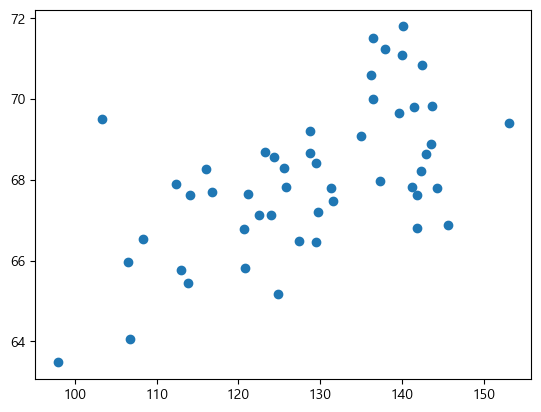

In [77]:
import matplotlib.pyplot as plt

plt.scatter(weightList, heightList)
plt.show()

## 문제 S-4: Iris

Iris 데이터는 아이리스 꽃관련 sepal width, sepal length, petal_length and petal_width 데이터를 제공한다.
sepal은 꽃받침으로, 대부분의 꽃에서 녹색이다. petal은 꽃받침 안의 꽃잎을 말한다.
이 데이터는 아이리스 꽃 3종류 (Iris setosa, Iris virginica and Iris versicolor)와 관련 속성데이터를 가지고 있어 기계학습에서 많이 사용된다.

### pairplot

Seaborn의 Pairplot은 pairwise plot으로 쌍으로 데이터의 관계를 시각화한다. x축, y축으로 변수를 나열하고, 바둑판 그리드에 관계를 그린다.

Seaborn은 matplotlib를 기반으로 한 데이터 시각화 라이브러리이다.
설치하려면, 명령창에 ```pip install seaborn```이라고 입력하고 <ENTER>한다.
Anaconda, Databricks에는 이미 설치가 되어 있을 것이라서, 설치가 필요없다.

> **Matplotlib이 font cache를 구축**한다는 메시지

> Matplotlib is building the font cache; this may take a moment.
이런 메시지가 보이면, 아래 명령어 출력 디렉토리를 삭제한다.
```
import matplotlib as mpl
print (mpl.get_cachedir())
```

seaborn에서 iris데이터를 불러보자.

In [3]:
import seaborn as sns

iris1 = sns.load_dataset("iris")

데이터가 잘 읽혔는지, 몇 행만 읽어보자.

In [4]:
iris1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


앞에서 읽은 데이터를 pairplot으로 그려보자.
* kind는 ‘scatter’, ‘kde’, ‘hist’, ‘reg’ 4가지 종류 가운데 하나를 선택한다.
* hue는 다른 색으로 그리게 되는 변수, 여기서는 species를 선택했다. 3가지 꽃 종류를 다른 색으로 그린다.

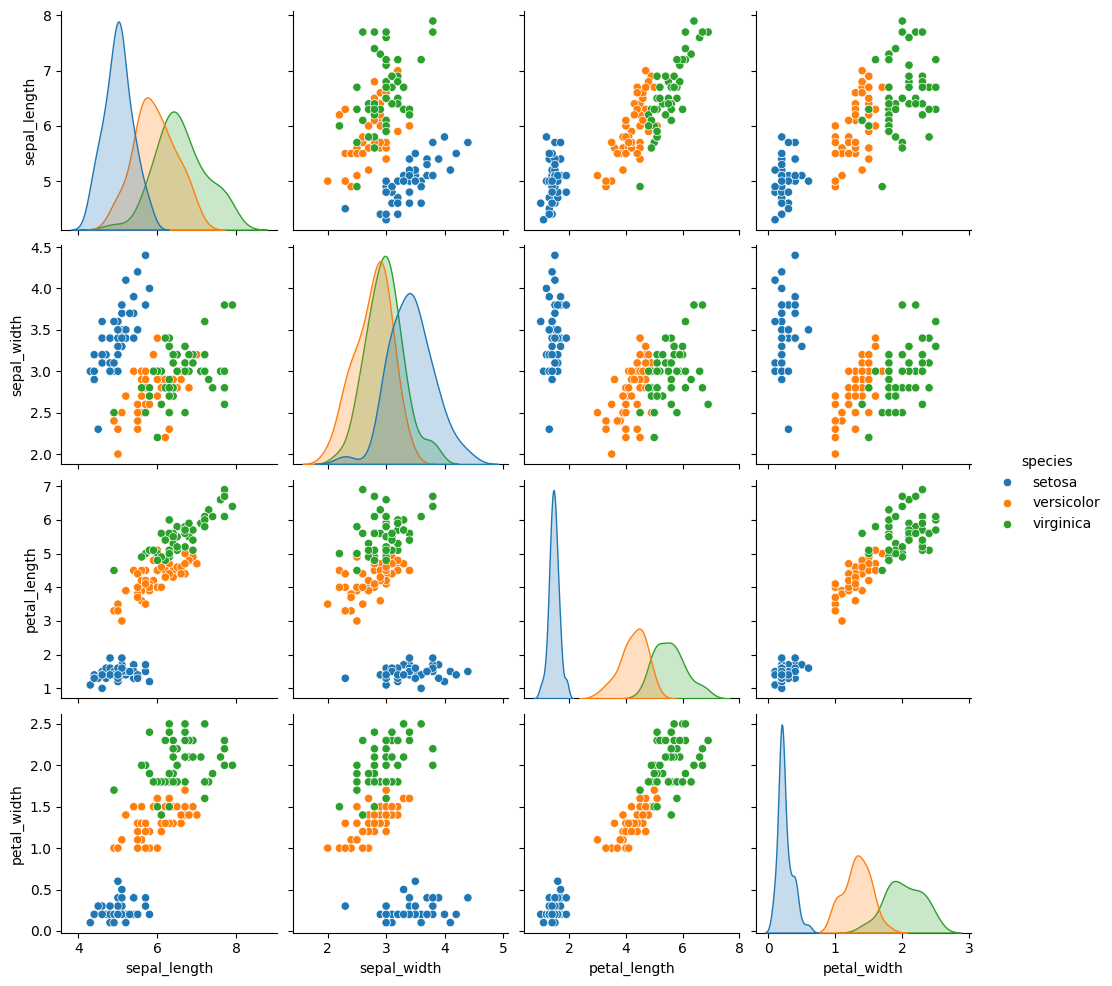

In [5]:
import matplotlib.pyplot as plt

sns.pairplot(iris1, kind="scatter", hue="species")
plt.show()

### spark로 correlation

In [6]:
#import os, sys
#os.environ["PYSPARK_PYTHON"]=sys.executable #"/usr/bin/python3"
#os.environ["PYSPARK_DRIVER_PYTHON"]=sys.executable #"/usr/bin/python3"

import pyspark
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

### 데이터

Iris 데이터는 UC Irvine대학의 Machine Learning Repository에서도 구할 수 있다.
http://archive.ics.uci.edu/ml/machine-learning-databases/iris/ URL에서 Python으로 직접 가져오자 (https를 적용하면 인증서가 필요하다)

In [8]:
import pandas as pd

file_name = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris = pd.read_csv(file_name, names=["sepal_length","sepal_width","petal_length", "petal_width","species"])

데이터가 잘 읽혔는지 몇 줄을 출력해보자.

In [9]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### boxplot

박스는 IQR (Interquartile Range), 즉 25%~75%의 구간을 의미한다.
그리고 위 아래 가로선은 IQR 값의 1.5배되는 구역을 나타낸다.
2번째 boxplot에서 나타나는 점들은 outlier를 의미한다.
outlier는 그 벗어난 정도가 심하지 않으므로 그대로 두기로 한다.

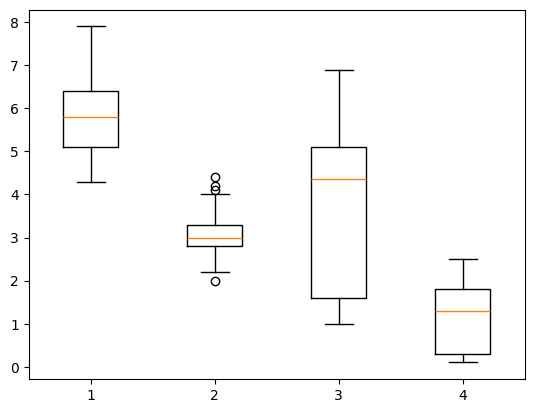

In [10]:
import matplotlib.pyplot as plt

iris4 = [ iris.sepal_length, iris.sepal_width, iris.petal_length, iris.petal_width ]
plt.boxplot(iris4)
plt.show()

### DataFrame 생성

DataFrame을 생성하고, schema를 확인해보자.
Spark는 url에서 직접 읽을 수 없으므로, pandas의 DataFrame에서 만들자.

In [11]:
irisDf = spark.createDataFrame(iris)

In [12]:
irisDf.printSchema()

root
 |-- sepal_length: double (nullable = true)
 |-- sepal_width: double (nullable = true)
 |-- petal_length: double (nullable = true)
 |-- petal_width: double (nullable = true)
 |-- species: string (nullable = true)



### 상관관계

Spark에서는 features 컬럼을 입력받아서 모델링을 한다. 상관관계를 계산할 4개의 컬럼을 묶어서 features 컬럼을 만들어 준다.

In [13]:
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
                                       outputCol="features")
df_vector = assembler.transform(irisDf).select("features")

In [15]:
from pyspark.ml.stat import Correlation

# get correlation matrix
matrix = Correlation.corr(df_vector, "features")

### 상관관계표 출력

변수를 짝을 지어 상관관계를 출력한다.
```collect()``` 함수는 Row List를 출력하게 된다.

In [16]:
matrix.collect()

[Row(pearson(features)=DenseMatrix(4, 4, [1.0, -0.1094, 0.8718, 0.818, -0.1094, 1.0, -0.4205, -0.3565, 0.8718, -0.4205, 1.0, 0.9628, 0.818, -0.3565, 0.9628, 1.0], False))]

Row List를 인덱스로 상관관계 배열만 출력할 수 있다.
- 대각선은 1, 자신에 대한 상관관계
- 나머지는 변인간 상관관계를 보여주고 있다.

In [17]:
matrix.collect()[0][0].toArray()

array([[ 1.        , -0.10936925,  0.87175416,  0.81795363],
       [-0.10936925,  1.        , -0.4205161 , -0.35654409],
       [ 0.87175416, -0.4205161 ,  1.        ,  0.9627571 ],
       [ 0.81795363, -0.35654409,  0.9627571 ,  1.        ]])

## 연습문제

서울시 열린데이터광장에서 검색을 하면 '서울특별시 코로나19 자치구별 확진자 발생동향'이 있다.
https://data.seoul.go.kr/dataList/OA-20470/S/1/datasetView.do
데이터를 '내려받기'해서 '서울특별시\ 코로나19\ 자치구별\ 확진자\ 발생동향.json' 파일을 분석하세요.
(OpenAPI의 샘플 url: http://openAPI.seoul.go.kr:8088/(인증키)/xml/TbCorona19CountStatusJCG/1/5/)

- 1) DataFrame 생성하고, 스키마는 자동인식하여 출력
- 2) null 값을 제거하고 null 건수 출력 (null이 남아있는지 확인하기 위해), 전체 건수 출력.
- 3) 종로, 마포, 용산, 합계 10건 출력

```
+------+----+-------+------+
|jongno|mapo|yongsan|   tot|
+------+----+-------+------+
|  1968|4127|   3031|9126.0|
```

4) 종로구의 2020년 3월 데이터만 10건 출력

```
+-------------+------+
|       jcg_dt|jongno|
+-------------+------+
|2020.03.31.10|    13|
...
```

5) 년 x 월별 합계 10건 출력

```
+-----+-------+-------+
|month|   2020|   2021|
+-----+-------+-------+
|   07| 1273.0|62849.0|
...
```


### DataFrame 생성하고, 스키마는 자동인식하여 출력

In [1]:
import os, sys
import pyspark

os.environ["PYSPARK_PYTHON"]=sys.executable # C:\\Program Files\\Python39\\python.exe #"/usr/bin/python3"
os.environ["PYSPARK_DRIVER_PYTHON"]="C:\\Program Files\\Python39\\python.exe" #sys.executable #"/usr/bin/python3"

myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

파일명의 공백에 대해 "\ "을 넣어주면 파일을 인식하지 못하고 있다.

In [2]:
jfile= os.path.join('data','서울특별시\ 코로나19\ 자치구별\ 확진자\ 발생동향.json')
os.path.isfile(jfile)

False

그냥 파일 명을 넣어주면 인식하고 있다.

In [3]:
jfile= os.path.join('data','서울특별시 코로나19 자치구별 확진자 발생동향.json')
os.path.isfile(jfile)

True

In [4]:
_coronaDf= spark.read.json(jfile)

```
<?xml version="1.0" encoding="UTF-8"?>
<TbCorona19CountStatusJCG>
<list_total_count>623</list_total_count>
<RESULT>
    <CODE>INFO-000</CODE>
    <MESSAGE>정상 처리되었습니다</MESSAGE>
</RESULT>
<row>
    <JCG_DT>2021.10.18.00</JCG_DT> # 자치구 기준일
    <JONGNO>1968</JONGNO>
    <JONGNOADD>13</JONGNOADD>
    <JUNGGU>1960</JUNGGU>
    <JUNGGUADD>4</JUNGGUADD>
    <YONGSAN>3031</YONGSAN>
    <YONGSANADD>8</YONGSANADD>
    <SEONGDONG>3132</SEONGDONG>
    <SEONGDONGADD>13</SEONGDONGADD>
    <GWANGJIN>3859</GWANGJIN>
    <GWANGJINADD>8</GWANGJINADD>
    <DDM>4165</DDM>                # 동대문구 전체
    <DDMADD>10</DDMADD>
    <JUNGNANG>4189</JUNGNANG>      # 중랑구 전체
    <JUNGNANGADD>13</JUNGNANGADD>
    <SEONGBUK>4294</SEONGBUK>
    <SEONGBUKADD>25</SEONGBUKADD>
    <GANGBUK>3054</GANGBUK>
    <GANGBUKADD>9</GANGBUKADD>
    <DOBONG>2938</DOBONG>
    <DOBONGADD>10</DOBONGADD>
    <NOWON>4387</NOWON>
    <NOWONADD>10</NOWONADD>
    <EP>4818</EP>                   # 은평구 전체
    <EPADD>9</EPADD>
    <SDM>3024</SDM>                 # 서대문 전체
    <SDMADD>7</SDMADD>
    <MAPO>4127</MAPO>
    <MAPOADD>6</MAPOADD>
    <YANGCHEON>3619</YANGCHEON>
    <YANGCHEONADD>5</YANGCHEONADD>
    <GANGSEO>4901</GANGSEO>
    <GANGSEOADD>13</GANGSEOADD>
    <GURO>5244</GURO>
    <GUROADD>39</GUROADD>
    <GEUMCHEON>2512</GEUMCHEON>
    <GEUMCHEONADD>18</GEUMCHEONADD>
    <YDP>5062</YDP>                 # 영등포구 전체
    <YDPADD>23</YDPADD>
    <DONGJAK>4535</DONGJAK>
    <DONGJAKADD>12</DONGJAKADD>
    <GWANAK>5893</GWANAK>
    <GWANAKADD>16</GWANAKADD>
    <SEOCHO>4541</SEOCHO>
    <SEOCHOADD>5</SEOCHOADD>
    <GANGNAM>7570</GANGNAM>
    <GANGNAMADD>20</GANGNAMADD>
    <SONGPA>7015</SONGPA>
    <SONGPAADD>14</SONGPAADD>
    <GANGDONG>4381</GANGDONG>
    <GANGDONGADD>20</GANGDONGADD>
    <ETC>7846</ETC>                 # 기타 전체
    <ETCADD>25</ETCADD>
    <WORK_DTTM>2021-10-18 19:11:43.0</WORK_DTTM> # 수집일
</row>
<row>
    <JCG_DT>2021.10.17.00</JCG_DT>
    ...
    <WORK_DTTM>2021-10-17 19:11:43.0</WORK_DTTM>
</row>
<row>
    <JCG_DT>2021.10.16.00</JCG_DT>
    ...
    <WORK_DTTM>2021-10-16 19:11:43.0</WORK_DTTM>
</row>
<row>
    <JCG_DT>2021.10.15.00</JCG_DT>
    ...
    <WORK_DTTM>2021-10-15 19:11:42.0</WORK_DTTM>
</row>
</TbCorona19CountStatusJCG>
```

In [5]:
_coronaDf.printSchema()

root
 |-- _corrupt_record: string (nullable = true)
 |-- ddm: string (nullable = true)
 |-- ddmadd: string (nullable = true)
 |-- dobong: string (nullable = true)
 |-- dobongadd: string (nullable = true)
 |-- dongjak: string (nullable = true)
 |-- dongjakadd: string (nullable = true)
 |-- ep: string (nullable = true)
 |-- epadd: string (nullable = true)
 |-- etc: string (nullable = true)
 |-- etcadd: string (nullable = true)
 |-- gangbuk: string (nullable = true)
 |-- gangbukadd: string (nullable = true)
 |-- gangdong: string (nullable = true)
 |-- gangdongadd: string (nullable = true)
 |-- gangnam: string (nullable = true)
 |-- gangnamadd: string (nullable = true)
 |-- gangseo: string (nullable = true)
 |-- gangseoadd: string (nullable = true)
 |-- geumcheon: string (nullable = true)
 |-- geumcheonadd: string (nullable = true)
 |-- guro: string (nullable = true)
 |-- guroadd: string (nullable = true)
 |-- gwanak: string (nullable = true)
 |-- gwanakadd: string (nullable = true)
 |-- g

### null 제외, null 건수 출력

전체 건수는 628이다.

In [6]:
_coronaDf.count()

628

은평구를 선택하여 (육안으로 훓어보니 나머지도 동일하다), NULL이 아닌 건수는 600이다.

In [7]:
_coronaDf.filter(_coronaDf['ep'].isNotNull()).count()

600

컬럼을 선택하는 방식으로 F.col()을 사용해도 된다. NULL은 전체 28건이다 (628 - 600).

In [9]:
from pyspark.sql import functions as F

_coronaDf.where(F.col("ep").isNull()).count()

28

nan은 전혀 없는 것으로 결과가 나온다.

In [10]:
from pyspark.sql.functions import isnan

_coronaDf.where(isnan(F.col("ep"))).count()

0

지금까지 보듯이, 전체에 대하여 null, nan이 몇 건이나 있는지 확인하면 대부분 28건이다. 그 외 컬럼을 보면:

* ```_corrupt_record```는 623건
* ```work_dttm```는 461건
* ```jcg_dt```는 5건

In [11]:
from pyspark.sql.functions import isnan, when, count, col
_coronaDf.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in _coronaDf.columns]).show()

+---------------+---+------+------+---------+-------+----------+---+-----+---+------+-------+----------+--------+-----------+-------+----------+-------+----------+---------+------------+----+-------+------+---------+--------+-----------+------+------+---------+------+---------+--------+-----------+----+-------+-----+--------+---+------+------+---------+--------+-----------+---------+------------+------+---------+---------+---------+------------+---+------+-------+----------+
|_corrupt_record|ddm|ddmadd|dobong|dobongadd|dongjak|dongjakadd| ep|epadd|etc|etcadd|gangbuk|gangbukadd|gangdong|gangdongadd|gangnam|gangnamadd|gangseo|gangseoadd|geumcheon|geumcheonadd|guro|guroadd|gwanak|gwanakadd|gwangjin|gwangjinadd|jcg_dt|jongno|jongnoadd|junggu|jungguadd|jungnang|jungnangadd|mapo|mapoadd|nowon|nowonadd|sdm|sdmadd|seocho|seochoadd|seongbuk|seongbukadd|seongdong|seongdongadd|songpa|songpaadd|work_dttm|yangcheon|yangcheonadd|ydp|ydpadd|yongsan|yongsanadd|
+---------------+---+------+------+-----

NULL을 제외하거나, 제외하지 않거나 무관하게 합계, 평균은 동일하다.

In [12]:
_coronaDf.filter(_coronaDf['ep'].isNotNull()).select(_coronaDf.ep).agg({"ep":"sum"}).show()

_coronaDf.select(_coronaDf.ep).agg({"ep":"sum"}).show()

+--------+
| sum(ep)|
+--------+
|677069.0|
+--------+

+--------+
| sum(ep)|
+--------+
|677069.0|
+--------+



In [13]:
_coronaDf.filter(_coronaDf['ep'].isNotNull()).select(_coronaDf.ep).agg({"ep":"average"}).show()

_coronaDf.select(_coronaDf.ep).agg({"ep":"average"}).show()

+------------------+
|           avg(ep)|
+------------------+
|1128.4483333333333|
+------------------+

+------------------+
|           avg(ep)|
+------------------+
|1128.4483333333333|
+------------------+



따라서 결측값이 많은 컬럼은 제외하도록 하자.

* ```_corrupt_record```는 623건
* ```work_dttm```는 461건
* ```jcg_dt```는 5건

In [14]:
coronaDf = _coronaDf.drop('_corrupt_record').drop('work_dttm')

In [15]:
coronaDf.printSchema()

root
 |-- ddm: string (nullable = true)
 |-- ddmadd: string (nullable = true)
 |-- dobong: string (nullable = true)
 |-- dobongadd: string (nullable = true)
 |-- dongjak: string (nullable = true)
 |-- dongjakadd: string (nullable = true)
 |-- ep: string (nullable = true)
 |-- epadd: string (nullable = true)
 |-- etc: string (nullable = true)
 |-- etcadd: string (nullable = true)
 |-- gangbuk: string (nullable = true)
 |-- gangbukadd: string (nullable = true)
 |-- gangdong: string (nullable = true)
 |-- gangdongadd: string (nullable = true)
 |-- gangnam: string (nullable = true)
 |-- gangnamadd: string (nullable = true)
 |-- gangseo: string (nullable = true)
 |-- gangseoadd: string (nullable = true)
 |-- geumcheon: string (nullable = true)
 |-- geumcheonadd: string (nullable = true)
 |-- guro: string (nullable = true)
 |-- guroadd: string (nullable = true)
 |-- gwanak: string (nullable = true)
 |-- gwanakadd: string (nullable = true)
 |-- gwangjin: string (nullable = true)
 |-- gwangjin

ddm의 null만 제외해도 다른 모든 컬럼의 null이 제거되는 것을 확인할 수 있다.

In [16]:
from pyspark.sql import functions as F

coronaDf = coronaDf.filter(F.col("ddm").isNotNull())

In [17]:
from pyspark.sql.functions import isnan, when, count, col
coronaDf.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in coronaDf.columns]).show()

+---+------+------+---------+-------+----------+---+-----+---+------+-------+----------+--------+-----------+-------+----------+-------+----------+---------+------------+----+-------+------+---------+--------+-----------+------+------+---------+------+---------+--------+-----------+----+-------+-----+--------+---+------+------+---------+--------+-----------+---------+------------+------+---------+---------+------------+---+------+-------+----------+
|ddm|ddmadd|dobong|dobongadd|dongjak|dongjakadd| ep|epadd|etc|etcadd|gangbuk|gangbukadd|gangdong|gangdongadd|gangnam|gangnamadd|gangseo|gangseoadd|geumcheon|geumcheonadd|guro|guroadd|gwanak|gwanakadd|gwangjin|gwangjinadd|jcg_dt|jongno|jongnoadd|junggu|jungguadd|jungnang|jungnangadd|mapo|mapoadd|nowon|nowonadd|sdm|sdmadd|seocho|seochoadd|seongbuk|seongbukadd|seongdong|seongdongadd|songpa|songpaadd|yangcheon|yangcheonadd|ydp|ydpadd|yongsan|yongsanadd|
+---+------+------+---------+-------+----------+---+-----+---+------+-------+----------+----

### 컬럼 합계

컬럼에는 일자가 제외되면서 코로나 발생건수만 남게 되었다.
컬럼의 합계를 구하면 전체 발생건수가 된다.

동대문구 (ddm, ddmadd)를 합산해보자. ```printSchema()``` 출력을 살펴보면, 문자열인데도 불구하고 합산이 되고 있다.

In [19]:
coronaDf.withColumn('tot', F.col('ddm') + F.col('ddmadd')).take(1)

[Row(ddm='4165', ddmadd='10', dobong='2938', dobongadd='10', dongjak='4535', dongjakadd='12', ep='4818', epadd='9', etc='7846', etcadd='25', gangbuk='3054', gangbukadd='9', gangdong='4381', gangdongadd='20', gangnam='7570', gangnamadd='20', gangseo='4901', gangseoadd='13', geumcheon='2512', geumcheonadd='18', guro='5244', guroadd='39', gwanak='5893', gwanakadd='16', gwangjin='3859', gwangjinadd='8', jcg_dt='2021.10.18.00', jongno='1968', jongnoadd='13', junggu='1960', jungguadd='4', jungnang='4189', jungnangadd='13', mapo='4127', mapoadd='6', nowon='4387', nowonadd='10', sdm='3024', sdmadd='7', seocho='4541', seochoadd='5', seongbuk='4294', seongbukadd='25', seongdong='3132', seongdongadd='13', songpa='7015', songpaadd='14', yangcheon='3619', yangcheonadd='5', ydp='5062', ydpadd='23', yongsan='3031', yongsanadd='8', tot=4175.0)]

In [18]:
coronaDf.withColumn('tot', F.col('jongno') + F.col('mapo') + F.col('yongsan')).select('jongno', 'mapo', 'yongsan', 'tot').show(1)

+------+----+-------+------+
|jongno|mapo|yongsan|   tot|
+------+----+-------+------+
|  1968|4127|   3031|9126.0|
+------+----+-------+------+
only showing top 1 row



```pyspark.sql.functions.expr(str)```을 사용하면 연산식이 일목요연해진다.

In [19]:
from pyspark.sql.functions import expr

corDf = coronaDf.withColumn('total', expr("ddm + ddmadd + dobong + dobongadd"))

In [20]:
corDf.take(1)

[Row(ddm='4165', ddmadd='10', dobong='2938', dobongadd='10', dongjak='4535', dongjakadd='12', ep='4818', epadd='9', etc='7846', etcadd='25', gangbuk='3054', gangbukadd='9', gangdong='4381', gangdongadd='20', gangnam='7570', gangnamadd='20', gangseo='4901', gangseoadd='13', geumcheon='2512', geumcheonadd='18', guro='5244', guroadd='39', gwanak='5893', gwanakadd='16', gwangjin='3859', gwangjinadd='8', jcg_dt='2021.10.18.00', jongno='1968', jongnoadd='13', junggu='1960', jungguadd='4', jungnang='4189', jungnangadd='13', mapo='4127', mapoadd='6', nowon='4387', nowonadd='10', sdm='3024', sdmadd='7', seocho='4541', seochoadd='5', seongbuk='4294', seongbukadd='25', seongdong='3132', seongdongadd='13', songpa='7015', songpaadd='14', yangcheon='3619', yangcheonadd='5', ydp='5062', ydpadd='23', yongsan='3031', yongsanadd='8', total=7123.0)]

sum() 함수는 리스트의 요소를 집계하는 Python 함수이다.

이 python sum() 함수는 pyspark.sql.functions.sum()과는 다르다.

컬럼명을 적으면 컬럼의 합계를 계산할 수 있다.
```
print(F.sum([1,2,3,4,5,1,4,5])) #
```

In [27]:
cols=coronaDf.columns

'jcg_dt'는 일자이므로 합산이 불가능하다. 이를 제거하자.

In [28]:
cols.remove('jcg_dt')

schema 설정을 보면 모두 문자열 값이다.

앞서 컬럼이 문자열임에도 불구하고, 합산이 되고 있다.

그럼에도 불구하고 문자열은 당연히 연산할 수 없으므로 정수형으로 변환하고 합산해야 한다.

```coronaDf[col].astype(IntegerType())``` 또는 ```coronaDf[col].cast(IntegerType())```

In [33]:
from pyspark.sql.types import IntegerType 
sum([coronaDf[col].astype(IntegerType()) for col in cols])

Column<'((((((((((((((((((((((((((((((((((((((((((((((((((((CAST(ddm AS INT) + 0) + CAST(ddmadd AS INT)) + CAST(dobong AS INT)) + CAST(dobongadd AS INT)) + CAST(dongjak AS INT)) + CAST(dongjakadd AS INT)) + CAST(ep AS INT)) + CAST(epadd AS INT)) + CAST(etc AS INT)) + CAST(etcadd AS INT)) + CAST(gangbuk AS INT)) + CAST(gangbukadd AS INT)) + CAST(gangdong AS INT)) + CAST(gangdongadd AS INT)) + CAST(gangnam AS INT)) + CAST(gangnamadd AS INT)) + CAST(gangseo AS INT)) + CAST(gangseoadd AS INT)) + CAST(geumcheon AS INT)) + CAST(geumcheonadd AS INT)) + CAST(guro AS INT)) + CAST(guroadd AS INT)) + CAST(gwanak AS INT)) + CAST(gwanakadd AS INT)) + CAST(gwangjin AS INT)) + CAST(gwangjinadd AS INT)) + CAST(jongno AS INT)) + CAST(jongnoadd AS INT)) + CAST(junggu AS INT)) + CAST(jungguadd AS INT)) + CAST(jungnang AS INT)) + CAST(jungnangadd AS INT)) + CAST(mapo AS INT)) + CAST(mapoadd AS INT)) + CAST(nowon AS INT)) + CAST(nowonadd AS INT)) + CAST(sdm AS INT)) + CAST(sdmadd AS INT)) + CAST(seocho AS 

다음 명령은 작동하지 않는다.

```
# coronaDf=coronaDf.withColumn('total', sum(coronaDf[col] for col in cols)) #문자열 합성을 하고, 합산을 하지 않는다.
coronaDf=coronaDf.withColumn('total', sum([coronaDf[col].cast(IntegerType()) for col in cols]))
```

* 배열로 만든 후, 합계를 할 수 있다.
```
#corDf = coronaDf.withColumn('totalArr', F.array(*[F.col(c).astype(IntegerType()) for c in coronaDf.columns]))
#corDf = coronaDf.withColumn('totalArr', F.array(*[F.col(c).astype(IntegerType()) for c in coronaDf.columns if c is not None]))

import numpy as np
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import udf

udf_function = udf(lambda x: int(np.array(x, dtype=int).sum()), IntegerType())
#udf_function = udf(lambda x: sum(x)), IntegerType()
corDf.withColumn('total', udf_function('totalArr')).take(1)
```

### 시간 모델링

WORK_DTTM 수집일은 기준일과 서로 다르다.
jcg_dt 기준일은 형식이 2021.10.18.00 이런 식이다.
따라서 아래와 같이 DateType()으로 변환하지 않도록 한다.

```
#coronaDf = coronaDf.withColumn('Date', coronaDf['jcg_dt'].cast(DateType()))
```

In [17]:
coronaDf.select('jcg_dt').show()

+-------------+
|       jcg_dt|
+-------------+
|2021.10.18.00|
|2021.10.17.00|
|2021.10.16.00|
|2021.10.15.00|
|2021.10.14.00|
|2021.10.13.00|
|2021.10.12.00|
|2021.10.11.00|
|2021.10.10.00|
|2021.10.09.00|
|2021.10.08.00|
|2021.10.07.00|
|2021.10.06.00|
|2021.10.05.00|
|2021.10.04.00|
|2021.10.03.00|
|2021.10.02.00|
|2021.10.01.00|
|2021.09.30.00|
|2021.09.29.00|
+-------------+
only showing top 20 rows



In [12]:
coronaDf = coronaDf.withColumn('year', coronaDf['jcg_dt'].substr(1,4))

In [13]:
coronaDf = coronaDf.withColumn('month', coronaDf['jcg_dt'].substr(6,2))

In [99]:
coronaDf.printSchema()

root
 |-- ddm: string (nullable = true)
 |-- ddmadd: string (nullable = true)
 |-- dobong: string (nullable = true)
 |-- dobongadd: string (nullable = true)
 |-- dongjak: string (nullable = true)
 |-- dongjakadd: string (nullable = true)
 |-- ep: string (nullable = true)
 |-- epadd: string (nullable = true)
 |-- etc: string (nullable = true)
 |-- etcadd: string (nullable = true)
 |-- gangbuk: string (nullable = true)
 |-- gangbukadd: string (nullable = true)
 |-- gangdong: string (nullable = true)
 |-- gangdongadd: string (nullable = true)
 |-- gangnam: string (nullable = true)
 |-- gangnamadd: string (nullable = true)
 |-- gangseo: string (nullable = true)
 |-- gangseoadd: string (nullable = true)
 |-- geumcheon: string (nullable = true)
 |-- geumcheonadd: string (nullable = true)
 |-- guro: string (nullable = true)
 |-- guroadd: string (nullable = true)
 |-- gwanak: string (nullable = true)
 |-- gwanakadd: string (nullable = true)
 |-- gwangjin: string (nullable = true)
 |-- gwangjin

In [137]:
coronaDf.count()

600

## 컬럼 합계

In [117]:
corDf.show(1)

+----+------+------+---------+-------+----------+----+-----+----+------+-------+----------+--------+-----------+-------+----------+-------+----------+---------+------------+----+-------+------+---------+--------+-----------+-------------+------+---------+------+---------+--------+-----------+----+-------+-----+--------+----+------+------+---------+--------+-----------+---------+------------+------+---------+---------+------------+----+------+-------+----------+------+
| ddm|ddmadd|dobong|dobongadd|dongjak|dongjakadd|  ep|epadd| etc|etcadd|gangbuk|gangbukadd|gangdong|gangdongadd|gangnam|gangnamadd|gangseo|gangseoadd|geumcheon|geumcheonadd|guro|guroadd|gwanak|gwanakadd|gwangjin|gwangjinadd|       jcg_dt|jongno|jongnoadd|junggu|jungguadd|jungnang|jungnangadd|mapo|mapoadd|nowon|nowonadd| sdm|sdmadd|seocho|seochoadd|seongbuk|seongbukadd|seongdong|seongdongadd|songpa|songpaadd|yangcheon|yangcheonadd| ydp|ydpadd|yongsan|yongsanadd| total|
+----+------+------+---------+-------+----------+----+

데이터는 2020년 2월 ~ 2021년 10월까지의 데이터이다.
따라서 해당 기간이 아닌 경우에는 null로 출력된다.
2020년 2월은 28, 29일의 데이터만 수집되어 있다는 점에 유의하자.

In [138]:
coronaDf.groupBy('month').pivot('year').agg( { "ddm":"sum"} ).show()

+-----+-------+-------+
|month|   2020|   2021|
+-----+-------+-------+
|   07| 1273.0|62849.0|
|   11| 7042.0|   null|
|   01|   null|23120.0|
|   09| 4067.0|90081.0|
|   05| 1018.0|49070.0|
|   08| 2158.0|74157.0|
|   03|  541.0|33773.0|
|   02|    2.0|26619.0|
|   06| 1063.0|51881.0|
|   10| 5156.0|70576.0|
|   12|14028.0|   null|
|   04|  911.0|37474.0|
+-----+-------+-------+



월별로 정렬해서 출력해보자. orderBy()와 sort() 함수를 적용한다.

In [17]:
#coronaDf.groupBy('month').pivot('year').agg( { "ddm":"sum"} ).orderBy('month').show()
coronaDf.groupBy('month').pivot('year').agg( { "ddm":"sum"} ).sort('month').show()

+-----+-------+-------+
|month|   2020|   2021|
+-----+-------+-------+
|   01|   null|23120.0|
|   02|    2.0|26619.0|
|   03|  541.0|33773.0|
|   04|  911.0|37474.0|
|   05| 1018.0|49070.0|
|   06| 1063.0|51881.0|
|   07| 1273.0|62849.0|
|   08| 2158.0|74157.0|
|   09| 4067.0|90081.0|
|   10| 5156.0|70576.0|
|   11| 7042.0|   null|
|   12|14028.0|   null|
+-----+-------+-------+



In [116]:
coronaDf.select("jcg_dt","jongno").filter((coronaDf.month == 2) & (coronaDf.year == 2020)).show(20)

+-------------+------+
|       jcg_dt|jongno|
+-------------+------+
|2020.02.29.10|    11|
|2020.02.28.10|    11|
+-------------+------+



상기 데이터를 보면, null 값이 상당히 존재한다.
그 내역을 보면 아무런 값이 없는 경우가 있다.

In [110]:
coronaDf.select("jcg_dt","jongno").filter((coronaDf.month == 3) & (coronaDf.year == 2020)).show(20)

+-------------+------+
|       jcg_dt|jongno|
+-------------+------+
|2020.03.31.10|    13|
|2020.03.30.10|    13|
|2020.03.29.10|    13|
|2020.03.28.10|    13|
|2020.03.27.00|    13|
|2020.03.26.00|    13|
|2020.03.25.00|    13|
|2020.03.24.00|    12|
|2020.03.23.00|    11|
|2020.03.22.00|    11|
|2020.03.21.00|    11|
|2020.03.20.00|    11|
|2020.03.19.00|    11|
|2020.03.18.00|    11|
|2020.03.17.10|    11|
|2020.03.16.10|    11|
|2020.03.15.10|    11|
|2020.03.14.10|    11|
|2020.03.13.10|    11|
|2020.03.12.10|    11|
+-------------+------+
only showing top 20 rows



In [143]:
coronaDf.filter((coronaDf.month == 11) & (coronaDf.year == 2021)).show()

+---+------+------+---------+-------+----------+---+-----+---+------+-------+----------+--------+-----------+-------+----------+-------+----------+---------+------------+----+-------+------+---------+--------+-----------+------+------+---------+------+---------+--------+-----------+----+-------+-----+--------+---+------+------+---------+--------+-----------+---------+------------+------+---------+---------+------------+---+------+-------+----------+----+-----+
|ddm|ddmadd|dobong|dobongadd|dongjak|dongjakadd| ep|epadd|etc|etcadd|gangbuk|gangbukadd|gangdong|gangdongadd|gangnam|gangnamadd|gangseo|gangseoadd|geumcheon|geumcheonadd|guro|guroadd|gwanak|gwanakadd|gwangjin|gwangjinadd|jcg_dt|jongno|jongnoadd|junggu|jungguadd|jungnang|jungnangadd|mapo|mapoadd|nowon|nowonadd|sdm|sdmadd|seocho|seochoadd|seongbuk|seongbukadd|seongdong|seongdongadd|songpa|songpaadd|yangcheon|yangcheonadd|ydp|ydpadd|yongsan|yongsanadd|year|month|
+---+------+------+---------+-------+----------+---+-----+---+------+-

In [118]:
coronaDf.filter((coronaDf.month == 7) & (coronaDf.year == 2020)).show(1)

+---+------+------+---------+-------+----------+---+-----+---+------+-------+----------+--------+-----------+-------+----------+-------+----------+---------+------------+----+-------+------+---------+--------+-----------+-------------+------+---------+------+---------+--------+-----------+----+-------+-----+--------+---+------+------+---------+--------+-----------+---------+------------+------+---------+---------+------------+---+------+-------+----------+----+-----+
|ddm|ddmadd|dobong|dobongadd|dongjak|dongjakadd| ep|epadd|etc|etcadd|gangbuk|gangbukadd|gangdong|gangdongadd|gangnam|gangnamadd|gangseo|gangseoadd|geumcheon|geumcheonadd|guro|guroadd|gwanak|gwanakadd|gwangjin|gwangjinadd|       jcg_dt|jongno|jongnoadd|junggu|jungguadd|jungnang|jungnangadd|mapo|mapoadd|nowon|nowonadd|sdm|sdmadd|seocho|seochoadd|seongbuk|seongbukadd|seongdong|seongdongadd|songpa|songpaadd|yangcheon|yangcheonadd|ydp|ydpadd|yongsan|yongsanadd|year|month|
+---+------+------+---------+-------+----------+---+----

## 연습문제

3주차 과제에서 데이터를 5천 ~ 1만 건 정도 수집해서 파일로 저장하였다. 내려받은 데이터를 분석하세요.

* 1) 문제 설정
먼저 관심있는 데이터를 수집했고, 그 데이터에 대해 뭔가 궁금하게 생각하는 의문이 있을 것이다.
예를 들어 '따릉이' 데이터에 대해 (1) 대여가 증가하는 추세인지? (2) 계절별로 차이가 있는지? 의문 또는 문제를 가질 수 있겠다.
이러한 의문은 증명가능하도록 만들어져야 분석을 통해 답할 수 있다.
문제는 2개만 만들자.

* 2)문제의 답
데이터를 분석을 하고 앞서 앞서 제기된 문제에 대해 답을 하자.
대여가 증가하는 추세이면 시간별로 대여건수가 늘어나는지 분석을 하여 (1) 맞다 또는 (2) 맞지 않다라고 결정할 수 있어야 한다.
시간별 대여건수를 그래프로 시각화하여 보여줄 수도 있다.
정량데이터이면 describe, groupBy, 통계검증 (anova), 상관관계 등 강의에서 배운 명령어를 활용하자.
정성데이터는 단어빈도를 계산해서, 어떤 단어가 많이 사용되었는지를 분석할 수 있다.
